# 分割と抽出
ネットワーク内のグループや属性を特定することは、友人関係のネットワークやSNSのネットワークにおいて非常に重要です。このプロセスを**分割**と**抽出**と呼び、**特定のコミュニティや属性を見つけ出すための強力な方法です。**ここでは、その重要性について説明します。

まず、友人関係のネットワークを考えてみましょう。学校や職場での友人関係は、しばしば複数の小さなグループに分かれます。これらのグループを特定することで、誰が誰と親しいか、どのグループが中心的な役割を果たしているかを理解することができます。このような分析は、コミュニティの構造を把握し、効率的な情報共有やイベントの企画に役立ちます。

SNSのネットワークでは、ユーザーがフォローしているアカウントや「いいね」を付けている投稿から、共通の興味や関心を持つグループを抽出することが可能です。グラフ理論における分割と抽出は、ネットワーク内のグループや属性を特定する強力な手段です。**分割**はグラフのパーティションにより、ネットワークを**複数の部分グラフに分ける**ことで、ソーシャルネットワークにおける友人関係や共通の興味を持つユーザーのグループを見つけることが可能となります。ただし、正しい解を得るためには適切な制約が必要です。

一方、グラフの**抽出**は特定の属性を持つノードやエッジを選択し、その特性を持つノードの集合やその関係を持つノード間のエッジを抽出して**新しいグラフを生成**します。この手法は特定の属性を持つユーザーの行動パターンの分析などに役立ちますが、抽出される部分グラフは分析の目的や関心に応じて異なります。抽出はネットワーク分割とは異なり、分割数や分割後のサイズがあらかじめ与えられないことが特徴で、ネットワークの密な部分を抽出するアプローチをコミュニティ抽出と呼びます。

適切な分割や抽出を行うためには**ネットワークの特性や目的に応じたアルゴリズムの選択が重要です**。また、得られた結果の解釈には対象となる**ネットワークの背景知識が必要です**。分割の適切性を評価するためにはモジュラリティを計算することが一般的です。**モジュラリティ**はネットワークと各頂点が属するコミュニティを入力として、コミュニティ抽出の成功を評価します。<br>

**1. 分割 (Partitioning):** グラフをいくつかの部分に分けること。各部分は一般的にノードの集合であり、部分間のエッジの数を最小化し、部分内のエッジの数を最大化することを目的とします。これはコミュニティ検出の一環です。<br>

**2. 抽出 (Extraction):** グラフから特定のサブグラフやノードの集合を取り出すこと。コミュニティ抽出は、密に結合されたノードの集合（コミュニティ）をグラフから見つけ出すことを指します。<br>

**3. コミュニティ特定 (Community Detection):** グラフ内のコミュニティ、すなわちノード間で密に結合されたグループを見つけ出すこと。これは分割と抽出を含む広い概念です。<br>

このスクリプトは、2つのサイクルとそれらをつなぐエッジを含むグラフを作成します。次に、指定したパーティションの有効性を確認し、各ノードがどのパーティションに属しているかを示すマップを作成します。ノード0と7が同じパーティションに属しているかを確認し、最後に元のグラフとパーティションごとに色分けされたグラフをサブプロットに描画して視覚化するものです。<br>
スクリプトの目的は、グラフの構造を作成および視覚化し、指定したパーティションの有効性を確認することです。また、各ノードがどのパーティションに属しているかを示すマップを作成し、特定のノードが同じパーティションに属しているかどうかをコンソールの出力と視覚的に理解することを目指しています。

Is partition valid? True
Partition Map:
{1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 0: 2, 7: 2}
Are node 0 and node 7 in the same partition? True


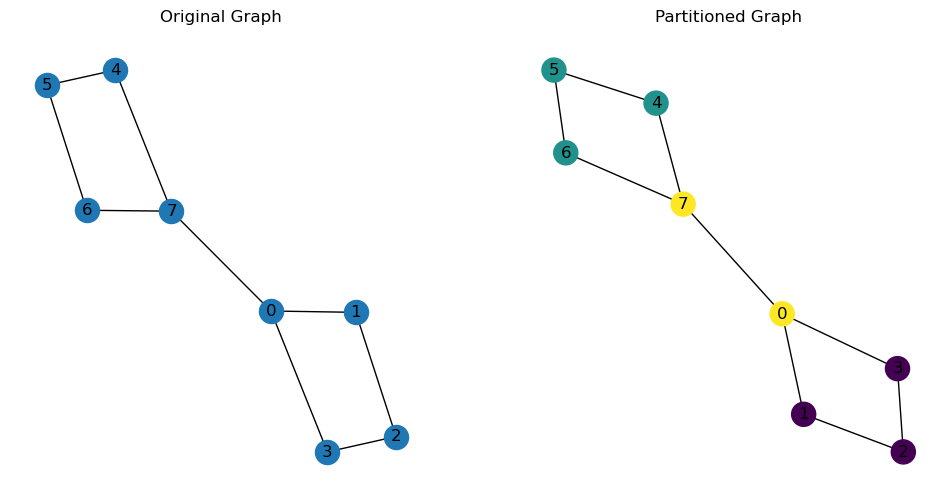

In [5]:
import random
import matplotlib.pyplot as plt
import networkx as nx

# グラフの作成
G = nx.Graph()
nx.add_cycle(G, [0, 1, 2, 3])
nx.add_cycle(G, [4, 5, 6, 7])
G.add_edge(0, 7)

# グラフの描画
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 元のグラフの描画
nx.draw(G, with_labels=True, ax=axes[0])
axes[0].set_title("Original Graph")

# パーティションの作成
partition = [
    {1, 2, 3},
    {4, 5, 6},
    {0, 7},
]

# パーティションの検証
is_partition = nx.community.is_partition(G, partition)
print(f"Is partition valid? {is_partition}")

# パーティションマップの作成
partition_map = {}
for idx, cluster_nodes in enumerate(partition):
    for node in cluster_nodes:
        partition_map[node] = idx

print("Partition Map:")
print(partition_map)

# パーティション間のノードの確認
same_partition = partition_map[0] == partition_map[7]
print(f"Are node 0 and node 7 in the same partition? {same_partition}")

# ノードカラーの設定
node_colors = [partition_map[n] for n in G.nodes]

# パーティションごとのカラーでのグラフの描画
nx.draw(G, node_color=node_colors, with_labels=True, ax=axes[1])
axes[1].set_title("Partitioned Graph")

# プロットの表示
plt.show()


# ネットワークの分割
## Kernighan-Lin（カーニガン・リン）アルゴリズム
Kernighan-Linアルゴリズムは、グラフ分割のためのヒューリスティックアルゴリズムです。1970年にBrian W. KernighanとShen Linによって提案されました。このアルゴリズムの目的は、グラフをほぼ等しい大きさの2つの部分に分割し、分割後のエッジカット（2つの部分にまたがるエッジの数）を最小化することです。

このアルゴリズムは、特にコミュニティ検出やネットワークの構造分析に利用されます。基本的な考え方は、グラフ内のエッジをできるだけ少なくするようにノードを2つのグループに分割することです。

まず、グラフのノードを2つのグループにランダムに分けます。次に、各ノードを別のグループに移動させることで、分割間のエッジの数を減らす操作を繰り返します。この操作は、移動によって発生するエッジの数と削減されるエッジの数の差分（コスト）を計算し、全体のコストが最も減少するように進められます。この操作を繰り返すことで、最適な分割が得られるまで続けます。

具体的な計算の流れを簡単に説明します。最初に**各ノードの初期配置を決めます**。次に、各ノードの移動に伴うコストを計算し、最もコストが低い（またはコストが最も減る）移動を選びます。これをグループ内の全てのノードに対して行い、全体のコストが最小となるような移動を決定します。これを繰り返し行い、全体のコストが最小となった時点でアルゴリズムを終了します。

このアルゴリズムの動作を身近な例で説明します。例えば、友達グループを2つのチームに分ける状況を考えてみましょう。全員が友達と一緒のチームに入りたいけれども、チームの人数を均等にする必要があります。最初にランダムに2つのチームに分けた後、友達関係がより多く残るようにメンバーを交換していきます。この交換操作を繰り返し、最終的に友達関係ができるだけ多く残るような2つのチームに分けるのが、カーニガン・リンアルゴリズムの考え方です。

Kernighan-Linアルゴリズムの応用例としては、ソーシャルネットワークの解析があります。例えば、FacebookやTwitterのユーザーネットワークを分析し、自然なコミュニティやグループを発見するために使用されます。また、VLSI設計やロードバランシングなどの分野でも、複雑なネットワークを効率的に分割するために用いられます。

<br>
以下のスクリプトでのアルゴリズムの入力は、頂点集合V、エッジ集合E、そして（オプションで）Eのエッジ上の数値的な重みを持つ無向グラフGです。アルゴリズムの目標は V を等しい（またはほぼ等しい）サイズの2つの互いに素な部分集合 A と B に分割することで、A から B へのエッジの部分集合の重みの総和 T を最小化することです。グラフが重み付けされていない場合、代わりに交差エッジの数を最小化することが目標となります。

### アルゴリズムの概要
1. **初期分割**<br>
    ・ グラフの頂点をランダムに、または特定の基準に従って2つの部分集合 𝐴 と 𝐵 に分けます。 <br>

2. **隣接リストの作成**<br>
    ・ 各頂点に対し、他の部分集合の頂点との接続数を記録します。<br>

3. **交換ステップ**<br>
    ・ 各ステップで部分集合 𝐴 から1つの頂点と、部分集合 𝐵 から1つの頂点を選び、これらを交換します。交換後のエッジカットの変化を評価し、
       カット数が減少する場合に交換を実行します。<br>
    ・ このプロセスを繰り返し、全ての頂点の交換が試されるまで続けます。<br>

4. **再帰的改善**<br>
・ 交換操作のステップが完了したら、全体のエッジカットが最小化されるまで再帰的にこのプロセスを繰り返します。<br>

### Kernighan-Lin（カーニガン・リン）アルゴリズムの利点
**二部グラフ分割の直感的理解**<br>
・Kernighan-Linアルゴリズムは、グラフを二分割する際にカットサイズを最小化することを目的としています。<br>
・可視化により、アルゴリズムがグラフをどのように二つの部分に分割しているのか、各ステップでどのノードがどちらの部分に移動されているのかを直感的に理解できます。<br>
**交換の効果の視覚化**<br>
・Kernighan-Lin アルゴリズムはノードのペアを交換することで分割のバランスを改善します。可視化することで、各交換が全体の分割コストにどのように影響するかを視覚的に追跡でき、アルゴリズムの効果を具体的に理解できます。<br>
**収束の過程の確認**<br>
・各ステップでの分割コストの変化や分割のバランスの改善を可視化することで、アルゴリズムの収束の過程を理解しやすくなります。<br>
**分割の品質の評価**<br>
・グラフの分割結果を可視化することで分割の品質を評価しやすくなります。特に、分割された二部グラフの内部と外部のエッジの数を視覚的に比較することで、分割の品質を定量的に評価できます。<br>

下記のスクリプトによってネットワークを初期分割し、Kernighan-Linアルゴリズムを適用してネットワークの最適分割を見つけるプロセスを可視化する事が可能です。<br>
**1. グラフの作成**<br>
・ nx.karate_club_graph() を使用してKarateクラブのグラフを作成します。<br>
**2. 初期分割の設定**<br>
・ グラフのノードをリストに変換し、そのリストを半分に分割して2つの部分集合に分けます。この部分集合を初期分割として使用します。<br>
**3. 初期分割の色付け**<br>
・ 初期分割に基づいて各ノードに色を付けます。このスクリプトでは3色（赤、青、緑）を使用して色付けを行います。<br>
**4. 初期分割の可視化**<br>
・ 初期分割されたグラフを可視化します。ノードは初期分割に基づいた色で表示され、エッジは黒で表示されます。<br>
**5. Kernighan-Linアルゴリズムの適用**<br>
・ kernighan_lin_bisection() 関数を使用して初期分割を入力として最適分割を計算します。このアルゴリズムはエッジカットを最小化するようにグラフを2つの部分に分割します。<br>
**6. 最適分割の色付け**<br>
・ 最適分割に基づいて各ノードに色を付け直します。<br>
**7. 最適分割の可視化**<br>
・ 最適分割されたグラフを再度可視化します。ノードは最適分割に基づいた色で表示され、エッジは黒で表示されます。<br>
**8. 最適分割のモジュラリティとカットサイズの計算**<br>
最適分割のモジュラリティとカットサイズを計算します。

スクリプトでのアルゴリズムの入力は、頂点集合V、エッジ集合E、そして（オプションで）Eのエッジ上の数値的な重みを持つ無向グラフGです。アルゴリズムの目標は V を等しい（またはほぼ等しい）サイズの2つの互いに素な部分集合 A と B に分割することで、A から B へのエッジの部分集合の重みの総和 T を最小化することです。グラフが重み付けされていない場合、代わりに交差エッジの数を最小化することが目標となります。


Initial Partition: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}, {32, 33, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}]
Initial Modularity: 0.2914488109293305
Initial Cut Size: 20
Optimal Modularity: 0.3998332115215232
Optimal Cut Size: 10


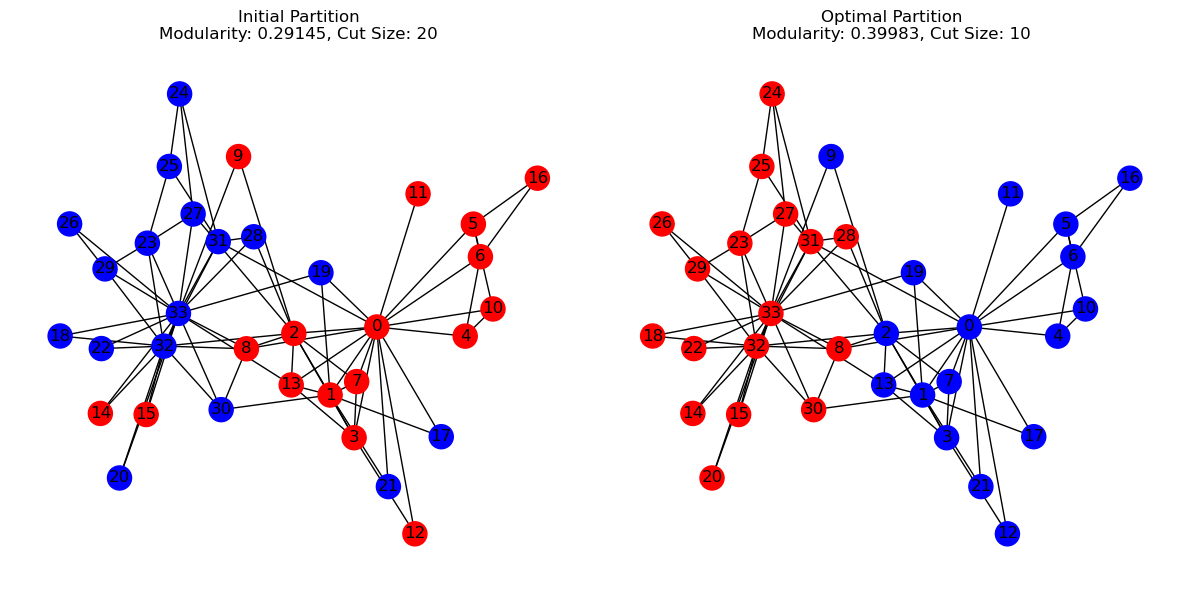

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import kernighan_lin_bisection
from networkx.algorithms.community.quality import modularity

# グラフの作成
G = nx.karate_club_graph()
colors = ['red', 'blue', 'green']
pos = nx.spring_layout(G)

# 初期分割の設定（ザカリーの空手クラブは属性や中心性の大きさから2つに分けられるので設定を2にした）
init_nodes = list(G.nodes())
init_partition = [set(init_nodes[:len(init_nodes)//2]), set(init_nodes[len(init_nodes)//2:])]
print("Initial Partition:", init_partition)

# 初期分割の色付け
color_map_i = ['black'] * len(G)
counter = 0
for c in init_partition:
    for n in c:
        color_map_i[n] = colors[counter]
    counter += 1

# Kernighan-Lin アルゴリズムの適用
lst_b = kernighan_lin_bisection(G, partition=init_partition)
color_map_b = ['black'] * len(G)
counter = 0
for c in lst_b:
    for n in c:
        color_map_b[n] = colors[counter]
    counter += 1

# 初期分割のモジュラリティとカットサイズの計算
initial_modularity = modularity(G, init_partition)
initial_cut_size = nx.cut_size(G, init_partition[0], init_partition[1])
print(f"Initial Modularity: {initial_modularity}")
print(f"Initial Cut Size: {initial_cut_size}")

# 最適分割のモジュラリティとカットサイズの計算
optimal_modularity = modularity(G, lst_b)
optimal_cut_size = nx.cut_size(G, lst_b[0], lst_b[1])
print(f"Optimal Modularity: {optimal_modularity}")
print(f"Optimal Cut Size: {optimal_cut_size}")

# サブプロットを作成
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# 初期分割の可視化
nx.draw_networkx_edges(G, pos, ax=axs[0])
nx.draw_networkx_nodes(G, pos, node_color=color_map_i, ax=axs[0])
nx.draw_networkx_labels(G, pos, ax=axs[0])
axs[0].axis('off')
axs[0].set_title("Initial Partition\nModularity: {:.5f}, Cut Size: {}".format(initial_modularity, initial_cut_size))

# 最適分割の可視化
nx.draw_networkx_edges(G, pos, ax=axs[1])
nx.draw_networkx_nodes(G, pos, node_color=color_map_b, ax=axs[1])
nx.draw_networkx_labels(G, pos, ax=axs[1])
axs[1].axis('off')
axs[1].set_title("Optimal Partition\nModularity: {:.5f}, Cut Size: {}".format(optimal_modularity, optimal_cut_size))

# 描画
plt.tight_layout()
plt.show()


上記のスクリプトはモジュラリティ関数を用いて、分割の有効性を指標にしています。一般的にモジュラリティの数値が高い方が良好な分割とされますが、モジュラリティの数値が高いか低いかだけではなく、ネットワーク内の実際のコミュニティ構造や期待される特性との一致を評価するために重要です。モジュラリティが高い分割が得られた場合でも、分割後のコミュニティが元のネットワークの構造をどれだけ反映しているか、特定の属性に基づいてグループ化されているかを注意深く検討する必要があります。<br>

## 初期分割の設定でクラスタリング結果が異なる
・初期分割をノードの度数を４と仮定して分割しています。<br>
・この分割は中心性や属性などから設定します。<br>

Initial Modularity: -0.05445924926444404
Initial Cut Size: 47
Optimal Modularity: 0.3045670058657073
Optimal Cut Size: 15


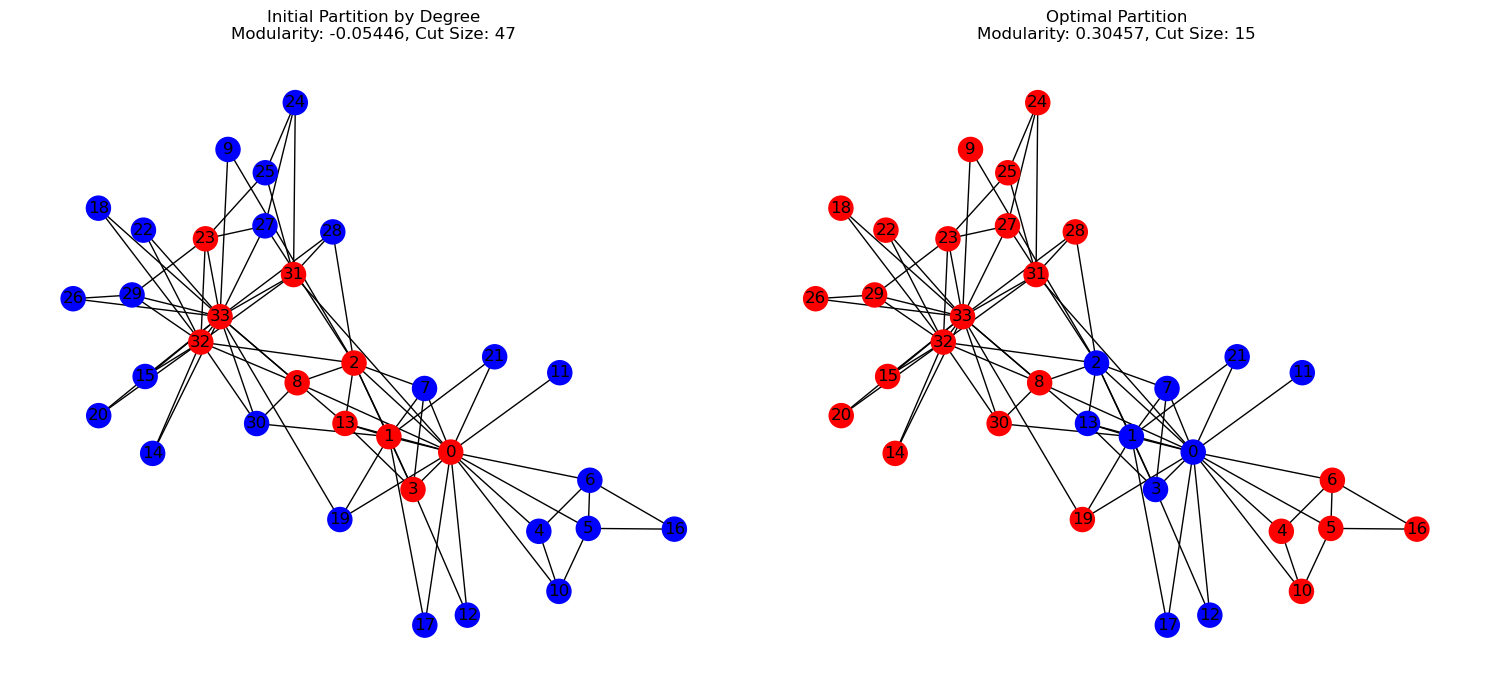

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import kernighan_lin_bisection
from networkx.algorithms.community.quality import modularity

# グラフの作成
G = nx.karate_club_graph()
colors = ['red', 'blue', 'green']
pos = nx.spring_layout(G)

# 特定の属性に基づく初期分割（例:ノードの度数で分割）
high_degree_nodes = {n for n, d in G.degree() if d > 4}
low_degree_nodes = set(G.nodes()) - high_degree_nodes
init_partition = [high_degree_nodes, low_degree_nodes]

# 初期分割の色付け
color_map_i = ['black'] * len(G)
counter = 0
for c in init_partition:
    for n in c:
        color_map_i[n] = colors[counter]
    counter += 1

# 初期分割のモジュラリティとカットサイズの計算
initial_modularity = modularity(G, init_partition)
initial_cut_size = nx.cut_size(G, init_partition[0], init_partition[1])
print(f"Initial Modularity: {initial_modularity}")
print(f"Initial Cut Size: {initial_cut_size}")

# Kernighan-Lin アルゴリズムの適用
lst_b = kernighan_lin_bisection(G, partition=init_partition)
color_map_b = ['black'] * len(G)
counter = 0
for c in lst_b:
    for n in c:
        color_map_b[n] = colors[counter]
    counter += 1

# 最適分割のモジュラリティとカットサイズの計算
optimal_modularity = modularity(G, lst_b)
optimal_cut_size = nx.cut_size(G, lst_b[0], lst_b[1])
print(f"Optimal Modularity: {optimal_modularity}")
print(f"Optimal Cut Size: {optimal_cut_size}")

# サブプロットを作成
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# 初期分割の可視化
axs[0].set_title("Initial Partition by Degree\nModularity: {:.5f}, Cut Size: {}".format(initial_modularity, initial_cut_size))
nx.draw_networkx_edges(G, pos, ax=axs[0])
nx.draw_networkx_nodes(G, pos, node_color=color_map_i, ax=axs[0])
nx.draw_networkx_labels(G, pos, ax=axs[0])
axs[0].axis('off')

# 最適分割の可視化
axs[1].set_title("Optimal Partition\nModularity: {:.5f}, Cut Size: {}".format(optimal_modularity, optimal_cut_size))
nx.draw_networkx_edges(G, pos, ax=axs[1])
nx.draw_networkx_nodes(G, pos, node_color=color_map_b, ax=axs[1])
nx.draw_networkx_labels(G, pos, ax=axs[1])
axs[1].axis('off')

# 描画
plt.tight_layout()
plt.show()


## スペクトラル分割
スペクトラル分割（Spectral Partitioning）は、グラフ分割の手法の一つで、グラフの頂点を2つ以上の部分に分ける際に、エッジのカット数を最小化することを目指します。この手法は、グラフのラプラシアン行列（各頂点の次数と隣接行列を用いて構成される行列）の固有値と固有ベクトルを利用します。

まず、スペクトラル分割の基本的なアイデアを説明します。グラフのラプラシアン行列の固有値を計算し、2番目に小さい固有値に対応する固有ベクトル（これを「フィードラー・ベクトル」と呼びます）を求めます。このフィードラー・ベクトルを用いて、頂点を2つのグループに分けます。具体的には、フィードラー・ベクトルの値が正の頂点を一方のグループに、負の頂点をもう一方のグループに分類します。こうすることで、エッジカットを最小化しつつ、グラフを2つの部分に分けることができます。

具体的な計算の流れを簡単に説明します。最初に**グラフのラプラシアン行列を作成します**。次に、このラプラシアン行列の固有値を計算し、2番目に小さい固有値を見つけます。この固有値に対応する固有ベクトル（フィードラー・ベクトル）を取得し、その値に基づいて頂点を2つのグループに分けます。これにより、エッジカットが最小となるような分割が得られます。

このアルゴリズムの動作を身近な例で説明します。例えば、学校のクラス全員を2つのグループに分ける状況を考えてみましょう。生徒同士の友達関係をエッジで表し、できるだけ友達同士が同じグループになるように分けたいとします。スペクトラル分割では、友達関係の情報を使ってラプラシアン行列を作成し、その行列の固有値と固有ベクトルを用いて、生徒たちを2つのグループに分けることができます。こうすることで、友達同士が分かれることを最小限に抑えつつ、クラスを2つに分けることができます。

スペクトラル分割の応用例としては、画像分割やクラスタリングがあります。画像分割では、画像を複数の領域に分ける際に、この手法が使われます。また、クラスタリングでは、大規模なデータセットを効率的にグループ化するために利用されます。さらに、ソーシャルネットワークの解析においても、ユーザーを自然なコミュニティに分けるために使用されます。


### アルゴリズムの概要
1. **グラフの表現**<br>
・グラフ 𝐺 は頂点集合 𝑉 と辺集合 𝐸 から構成されます。<br>
・𝐴 をグラフの隣接行列とし、頂点 𝑖 と 𝑗 が辺で接続されている場合に$A_{ij} = 1$、それ以外の場合に$A_{ij} = 0$<br>
2. **ラプラシアン行列**<br>
・ラプラシアン行列 𝐿 は隣接行列 𝐴 を用いて𝐿=𝐷−𝐴 として定義されます。ここで 𝐷 は次数行列で、対角成分が各頂点の次数を示す行列です。
3. **固有値と固有ベクトル**<br>
・ラプラシアン行列 𝐿 の固有値と固有ベクトルを計算します。これらは行列 𝐿 の特性を表し、特に二番目に小さい固有値に対応する固有ベクトル（「フォレストベクトル」または「Fiedlerベクトル」とも呼ばれる）は、グラフの自然な分割を示す重要な情報を含んでいます。
4. **分割の基準としてのFiedlerベクトル**<br>
・Fiedlerベクトルの符号に基づいて頂点を二つのグループに分けます。これは効果的な分割基準となります。
5. **切断する辺の数（cut size）**<br>
・スペクトラル分割はクラスタ間の辺の数を最小化するように設計されています。これにより分割後のグラフ間の接続を最小化することが目指されます。<br>
### スペクトラル分割の利点
**分割の直感的理解**<br>
・スペクトラル分割ではグラフのノードをラプラシアン行列の固有ベクトルを用いて分割します。可視化することで、どのノードがどの部分に属しているのかを直感的に理解でき、分割結果を視覚的に確認できます。<br>
**クラスタリング構造の把握**<br>
・スペクトラル分割はグラフをクラスタに分割するために使用されます。可視化することで各クラスタの内部構造やクラスタ間の関係を明確に把握でき、クラスタリングの品質を評価しやすくなります。<br>
**固有ベクトルの理解**<br>
・固有ベクトルを使った分割の過程を可視化することで固有ベクトルがどのようにしてノードの位置や分割を決定しているのかを理解しやすくなります。特に、二次元や三次元の空間に固有ベクトルをプロットすることでグラフの構造が視覚的に明示されます。<br>
**分割の品質の評価**<br>
・可視化を通じて分割の品質を評価することができます。例えば、ノードの色や形でクラスタを示すことで、クラスタ内部の密度やクラスタ間のエッジの数を視覚的に評価し、分割の効果を定量的に理解できます。<br>
<br>


### スペクトラル分割の応用
・ **コミュニティ検出：** ネットワーク内の密な部分を検出し、ノードをクラスタに分割する。<br>
・ **データクラスタリング：** 大規模データセットをグループに分割し、パターンや構造を発見する。<br>
・ **画像セグメンテーション：** 画像を異なる領域に分割し、物体や領域を特定する。<br>

下記のスクリプトでカラテクラブグラフのスペクトラル分割結果を確認し、グラフを視覚的に理解することができます。<br>
1. **グラフの作成**<br>
・ カラテクラブグラフと呼ばれる架空のグラフを作成します。<br>
2. **隣接行列の取得**<br> 
・ nx.adjacency_matrix() を使ってグラフ G の隣接行列を取得し、それを浮動小数点数型に変換します。
3. **次数行列の作成**<br>
・ 隣接行列 A の各ノードの次数を対角要素とする行列 D を作成します。<br>
4. **ラプラシアン行列の計算**<br> 
・ ラプラシアン行列 L を次数行列 D から隣接行列 A を引くことで計算します。<br>
5. **ラプラシアン行列の固有値と固有ベクトルの計算**<br>
・ scipy.sparse.linalg.eigsh() を使って、ラプラシアン行列 L の最小非ゼロ固有値に対応する固有ベクトル（Fiedlerベクトル）を計算します。<br>
6. **Fiedlerベクトルを使ったグループ分割**<br>
・ Fiedlerベクトルの符号に基づいてノードを二つのグループに分割します。この分割はスペクトラル分割によるものです。<br>
7. **分割の評価（モジュラリティ計算）**<br>
・ modularity() 関数を使って、分割のモジュラリティを計算しています。モジュラリティは分割の質を示す指標です。<br>
8. **カットサイズの計算**<br>
・ cut_size() 関数を使って、分割された2つのグループ間のカットサイズを計算します。<br>
9. **結果の出力**<br>
・ 分割のモジュラリティとカットサイズをコンソールに出力します。<br>
10. **その他の数値の出力と可視化**<br>
・ラプラシアン行列 L の表示<br>
・固有値の表示<br>
・Fiedlerベクトルの表示<br>
・グラフの可視化（ノードの色分け）<br>

**補足**<br>
・mod = modularity(groups, G)：'groups'はスペクトラル分割によって得られたノードグループワークを表しており'G'は対象となるグラフです。<br>
・'modularity()'関数は与えられたグループ分け('groups')のモジュラリティを計算します。この計算はスペクトラル分割に基づいています。

分割のモジュラリティ: 0.3714661406969083
カットサイズ: 10

ラプラシアン行列 L:
[[42. -4. -5. ... -2.  0.  0.]
 [-4. 29. -6. ...  0.  0.  0.]
 [-5. -6. 33. ...  0. -2.  0.]
 ...
 [-2.  0.  0. ... 21. -4. -4.]
 [ 0.  0. -2. ... -4. 38. -5.]
 [ 0.  0.  0. ... -4. -5. 48.]]

固有値:
[9.84198241e-15 1.18710730e+00]

Fiedlerベクトル:
[ 0.1233171   0.0580066   0.01368446  0.07445083  0.26733837  0.29881441
  0.29744558  0.06406144 -0.0530052  -0.12925543  0.28550172  0.20406685
  0.12324309  0.03493189 -0.17156602 -0.15520216  0.37166422  0.16804128
 -0.21148231  0.0625882  -0.18847412  0.1289233  -0.16858175 -0.14801794
 -0.15762212 -0.14632034 -0.19249255 -0.12982346 -0.09449019 -0.16960883
 -0.08368282 -0.1170647  -0.13538405 -0.12400534]


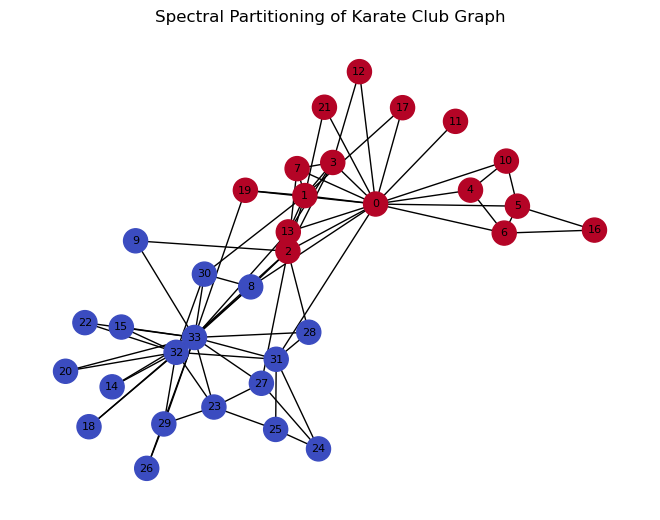

In [12]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigsh

# モジュラリティ関数の定義
def modularity(groups, G):
    m = G.number_of_edges()
    Q = 0
    for i in G.nodes:
        for j in G.nodes:
            if groups[i] == groups[j]:
                A_ij = 1 if G.has_edge(i, j) else 0
                k_i = G.degree[i]
                k_j = G.degree[j]
                Q += (A_ij - k_i * k_j / (2 * m))
    Q /= (2 * m)
    return Q

# カットサイズの計算関数の定義
def cut_size(groups, G):
    cut_size = 0
    for i, j in G.edges:
        if groups[i] != groups[j]:
            cut_size += 1
    return cut_size

# グラフの作成
G = nx.karate_club_graph()  # 架空のデータとしてカラテクラブグラフを使用

# 隣接行列の取得
A = nx.adjacency_matrix(G).astype(float)

# 次数行列の作成
D = np.diag(np.array(A.sum(axis=1)).flatten())

# ラプラシアン行列の計算
L = D - A

# ラプラシアン行列の固有値と固有ベクトルを計算
eigvals, eigvecs = eigsh(L, k=2, which='SM')

# 二番目に小さい固有値に対応する固有ベクトル（Fiedlerベクトル）を取得
fiedler_vector = eigvecs[:, 1]

# Fiedlerベクトルの符号に基づいて頂点を二つのグループに分割
groups = fiedler_vector > 0

# 分割の評価（モジュラリティ計算）
mod = modularity(groups, G)
print(f"分割のモジュラリティ: {mod}")

# カットサイズの計算
cut = cut_size(groups, G)
print(f"カットサイズ: {cut}")

# 各種数値をコンソールに出力
print("\nラプラシアン行列 L:")
print(L)  # NumPy配列を直接表示

print("\n固有値:")
print(eigvals)

print("\nFiedlerベクトル:")
print(fiedler_vector)

# print("\n各頂点のグループ:")
# for i, group in enumerate(groups):
#     print(f"頂点 {i}: グループ {group}")

# グラフの可視化
pos = nx.spring_layout(G)  # グラフレイアウトの計算
nx.draw(G, pos, with_labels=True, node_color=groups, cmap=plt.cm.coolwarm, node_size=300, font_size=8)
plt.title("Spectral Partitioning of Karate Club Graph")
plt.show()


## Louvain（ルヴァン）法
**Louvain法**はネットワークのコミュニティ（密接に結びついたノードのグループ）を検出するためのアルゴリズムです。この手法は**初期状態で各ノードが独自のコミュニティに属するところから始まり、反復的に各ノードの位置を調整していきます。具体的には、各ノードをその現在のコミュニティから一時的に削除し、隣接するコミュニティへの移動を検討します。そして、ノードを移動することでネットワーク全体のモジュラリティ（ネットワークの分割がどれだけ良いかを示す指標）が改善される場合に、そのノードを新しいコミュニティに移動させます。このプロセスを全ノードに対して繰り返し、モジュラリティが変化しなくなるまで続けることで、最適なコミュニティ構造が得られます**。

Louvain法の動作を身近な例で説明しましょう。例えば、学校のクラスの生徒たちを友達グループに分ける状況を考えてみましょう。最初は、生徒一人ひとりが個別のグループに属しています。その後、友達同士で集まるようにグループを作り直します。このとき、各生徒が自分の所属するグループを変更しても良いと仮定し、最も友達関係が多くなるような配置を探します。友達関係が増えるたびにグループを調整し、最終的に友達同士が集まった最適なグループ分けが得られるまで繰り返します。これがLouvain法の基本的な考え方です。

Louvain法の利点としては、高速でスケーラブルな計算性能に加え、自己組織化されたコミュニティの抽出が可能である点が挙げられます。これにより、ネットワーク全体のモジュラリティを最大化し、様々な種類のネットワークに適用できる柔軟性があります。また、直感的に理解しやすいコミュニティ構造を提供し、ネットワークのダイナミクスや時間的変化を考慮した解析も可能です。

一方で、Louvain法にはデメリットや注意点も存在します。貪欲な最適化手法を用いるため、局所最適解に収束しやすく、必ずしも全体の最適解を保証しません。また、ネットワークの初期状態や構造に依存するため、その設定によって得られるコミュニティ構造が異なる場合があります。さらに、大規模なネットワークや非常に密なネットワークでは、計算時間が増加する可能性もあります。得られるモジュラリティ値の解釈が難しいこともあり、高いモジュラリティが必ずしも意味のあるコミュニティ構造を示すとは限りません。これらの点を考慮して、Louvain法を適切に適用し、その結果を解析する必要があります。

Louvain法の応用例としては、ソーシャルネットワークの解析があります。例えば、FacebookやTwitterのユーザーネットワークを分析し、自然なコミュニティやグループを発見するために使用されます。また、遺伝子ネットワークの解析やマーケットバスケット解析、電力網の最適化など、多岐にわたる分野で利用されています。

### アルゴリズムの概要
1. **初期化**<br>
    ・各ノードを独立したコミュニティとして扱います。<br>
2. **最適化フェーズ**<br>
    ・各ノードを隣接するコミュニティに移動させ、モジュラリティの増加が最大になる移動を選択します。<br>
    ・このプロセスを、モジュラリティの改善が見られなくなるまで繰り返します。<br>
3. **集約フェーズ**<br>
    ・同じコミュニティに属するノードを1つのスーパーノードにまとめます。<br>
    ・新しいネットワークを構築し、スーパーノード間のエッジの重みを適切に調整します。<br>
4. **反復**<br>
    ・最適化フェーズと集約フェーズを、モジュラリティの改善が見られなくなるまで繰り返します。<br>
5. **最終結果の取得**<br>
    ・最後の反復で得られたコミュニティ構造を、元のネットワークに対応させて最終的な結果とします。<br>

### Louvain法の利点
**コミュニティの発見**<br>
・Louvain法はネットワーク内のコミュニティ（クラスタ）を発見するための効果的な手法です。可視化することで異なる色や形で表現されたコミュニティを視覚的に識別しやすくなり、ネットワーク内のコミュニティ構造を理解できます。<br>
**ダイナミックなコミュニティの追跡**<br>
・Louvain法はネットワークの時間的な変化に対しても適用できる**ダイナミックな手法**です。可視化によって異なる時点でのコミュニティの変化や移動を視覚的に追跡できます。<br>
**分割の品質の評価**<br>
・分割されたコミュニティの内部結合度や外部結合度を視覚的に確認し、分割の妥当性を評価することができます。<br>
**ネットワークの特性の理解**<br>
・ノードの位置やエッジの配置を可視化することで、ネットワーク内の重要な構造やパターンを把握できます。

以下のスクリプトはザカリーの空手クラブネットワークを可視化しつつ、Louvain法を用いてコミュニティ構造を抽出し、そのモジュラリティを計算するものです。<br>
1. **ネットワークの読み込み** <br>
・ networkx ライブラリを使ってザカリーの空手クラブネットワークを読み込みます。<br>
2. **コミュニティの抽出**<br>
・ greedy_modularity_communities を使ってLouvain法を適用し、ネットワークのコミュニティ構造を抽出します。<br>
・ これによりネットワーク内のメンバーがそれぞれ所属するコミュニティが得られます。<br>
3. **モジュラリティの計算**<br>
・ modularity 関数を使用して抽出したコミュニティ構造のモジュラリティを計算します。<br>
・ モジュラリティはネットワーク内のエッジの結びつきのパターンがランダムなネットワークよりどれだけ非ランダム的かを示す指標です。<br>
・ 値が高いほどネットワーク内のコミュニティ構造が強調されていることを示します。<br>
4. **可視化** <br>
・ matplotlib を使用してネットワークを描画します。<br>
・ 各ノードは所属するコミュニティに応じて色分けされ、ノードのラベルも表示されます。<br>
・ また、ノード間のエッジも描画され、ネットワーク全体の構造を直感的に理解するのに役立ちます。<br>

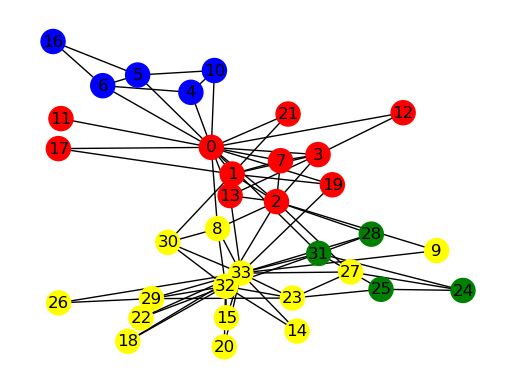

Modularity: 0.4439


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import label_propagation_communities
import community as community_louvain

# 空手クラブグラフを生成
G = nx.karate_club_graph()

# コミュニティの色を定義
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange']

# スプリングレイアウトを使用してノードの配置を計算
pos = nx.spring_layout(G)

# Louvain法を使用してコミュニティを検出
partition = community_louvain.best_partition(G)

# ノードの色を初期化（全てのノードを黒色に設定）
color_map = ['black'] * nx.number_of_nodes(G)

# 各ノードに対して色を割り当てる
for node, community in partition.items():
    color_map[node] = colors[community % len(colors)]

# グラフのエッジを描画
nx.draw_networkx_edges(G, pos)
# ノードを色付きで描画
nx.draw_networkx_nodes(G, pos, node_color=color_map)
# ノードのラベルを描画
nx.draw_networkx_labels(G, pos)
# 軸を非表示にする
plt.axis('off')
# グラフを表示
plt.show()

# Louvain法によるモジュラリティを計算
modularity = community_louvain.modularity(partition, G)
print(f"Modularity: {modularity:.4f}")


## Greedy Modularityアルゴリズム
**Greedy Modularityアルゴリズム**はネットワーク内のコミュニティ構造を発見するための方法です。このアルゴリズムの目的は**モジュラリティという指標を最大化することで、ネットワークを自然なグループに分割する**ことです。モジュラリティは、ネットワークの分割がどれだけ良いかを評価する指標であり、値が大きいほど良い分割を意味します。

このアルゴリズムの基本的な動作は、各ステップで全てのノードの移動を評価し、その中からモジュラリティが最も増加する移動を選ぶというものです。最初は、各ノードが独自のコミュニティに属している状態から始まります。そして、各ノードを他のコミュニティに移動させることを試み、その移動によってモジュラリティが増加するかどうかを確認します。最もモジュラリティが増加する移動を実行し、このプロセスを繰り返して、最適なコミュニティ構造が得られるまで続けます。

Greedy Modularityアルゴリズムの動作を身近な例で説明しましょう。例えば、学校のクラスの生徒たちを友達グループに分ける状況を考えてみましょう。最初は、生徒一人ひとりが個別のグループに属しています。その後、各生徒が他のグループに移動しても良いと仮定し、友達関係がより多くなるような移動を試みます。最も友達関係が増える移動を選び、これを繰り返すことで、最終的に友達同士が集まった最適なグループ分けが得られるまで続けます。これがGreedy Modularityアルゴリズムの基本的な考え方です。

計算の流れを簡単に説明します。まず**各ノードを独自のコミュニティに割り当てます**。次に、各ノードの移動によるモジュラリティの変化を計算し、最もモジュラリティが増加する移動を選択します。この操作を全てのノードに対して繰り返し行い、モジュラリティが最大になるまで続けます。アルゴリズムは、この繰り返しによって、ネットワーク全体のモジュラリティが最も高くなるようなコミュニティ構造を発見します。

一方、Louvain法は初期の局所的な最適化を行い、各ステップでノードを移動させて局所的なモジュラリティの増加を試みます。このプロセスは全ての可能な移動を探索するわけではなく、より効率的なアプローチをとります。貪欲性の観点から見ると、**Greedy Modularityアルゴリズムの方がより探索的であり、広範な移動の評価を行います。一方で、Louvain法はより効率的でありながらも高品質なコミュニティ構造を得るための手法として設計されています。**

Greedy Modularityアルゴリズムの応用例としては、ソーシャルネットワークの解析が挙げられます。例えば、FacebookやTwitterのユーザーネットワークを分析し、自然なコミュニティやグループを発見するために使用されます。また、遺伝子ネットワークの解析や電力網の最適化、マーケットバスケット解析など、多岐にわたる分野で利用されています。これにより、ネットワークの構造を理解し、効率的な戦略を立てることができます。<br>


### アルゴリズムの概要
1. **初期化**<br>
    ・各ノードを独立したコミュニティとして扱います。<br>
2. **モジュラリティ計算**<br>
    ・現在のコミュニティ構造に基づいてモジュラリティを計算します。<br>
3. **コミュニティ結合**<br>
    ・すべてのコミュニティペアに対して、それらを結合した場合のモジュラリティの変化を計算します。<br>
    ・モジュラリティの増加が最大となるペアを選択し、結合します。<br>
4. **更新**<br>
    ・新しいコミュニティ構造に基づいてモジュラリティを更新します。<br>
5. **反復**<br>
    ・ステップ3と4を、モジュラリティの増加が見られなくなるか、事前に定めた停止条件に達するまで繰り返します。<br>
6. **最終結果の出力**<br>
    ・最後の反復で得られたコミュニティ構造を最終結果として出力します。<br>

このアルゴリズムは、各ステップで局所的に最適な選択を行うため「貪欲（Greedy）」と呼ばれます。比較的シンプルで実装が容易ですが、大規模ネットワークでは計算コストが高くなる可能性があります。<br>

### Greedy Modularityアルゴリズムの利点
1. **コミュニティの特定と可視化**<br>
・Greedy Modularityアルゴリズムはネットワーク内のモジュラリティを最大化するようにコミュニティを検出します。可視化によって異なる色や形で表されたコミュニティを視覚的に識別しやすくなり、コミュニティ構造を理解できます。<br>
2. **動的なコミュニティの変化の追跡**<br>
・Greedy Modularityアルゴリズムはネットワークの時間的な変化にも対応できる方法です。可視化によって異なる時間ステップでのコミュニティの変化や移動を追跡しやすくなります。<br>
3. **モジュラリティの評価と最適化**<br>
・アルゴリズムによって生成されたコミュニティ分割のモジュラリティを評価するために可視化を使用できます。分割されたコミュニティの内部結合度と外部結合度を視覚的に確認し、モジュラリティの最適化に向けた改善点を理解できます。<br>
4. **ネットワークの構造と関係の理解**<br>
・ネットワークの構造やコミュニティ間の関係を理解するのに役立ちます。ノードの位置やエッジの配置を可視化することでコミュニティの形成や相互作用パターンを視覚的に分析できます。<br>


## Louvain法とGreedy Modularityアルゴリズムの違い
Louvain法とGreedy Modularityアルゴリズムは、どちらもネットワーク内のコミュニティ構造を検出するための方法ですが、いくつかの違いがあります。<br>
1. **アプローチの違い**<br>
・Louvain法は**局所的な最適化を繰り返すことで全体のモジュラリティを最大化**しようとします。具体的には各ノードを個別に移動させることでモジュラリティの増加を目指します。<br>
・Greedy Modularityアルゴリズムも同様にモジュラリティを最大化しますが、**より貪欲な方法でコミュニティを形成**します。ノードを1つずつコミュニティに追加し、その際にモジュラリティが最も増加するような方法で動作します。<br>
2. **実行時間とスケーラビリティ**<br>
・Louvain法は大規模なネットワークに対しても比較的高速に動作します。これは、局所的な最適化を繰り返すことで、効率的にコミュニティ構造を探索するためです。<br>
・Greedy Modularityアルゴリズムも効率的ですが、Louvain法よりも処理時間が長くなることがあります。特に大規模なネットワークでは実行時間の違いが顕著になることがあります。<br>
3. **コミュニティの品質と一貫性**<br>
・Louvain法は複数のステップを通じてモジュラリティを最大化するため、より高品質なコミュニティ分割を提供することが期待されます。この方法により、グローバルな最適化に向けた効果的な探索が行われます。<br>
・Greedy Modularityアルゴリズムは貪欲なアプローチを採用しており、局所的な最適化に留まることがあります。そのため、最終的な分割が局所的な最適性に偏ることがあるかもしれません。<br>
4. **ダイナミックなネットワークへの対応**<br>
・Louvain法はダイナミックなネットワークに対しても適用可能です。ネットワークが時間的に変化する場合でも変化に応じてコミュニティを再構築することができます。<br>
・Greedy Modularityアルゴリズムは静的なネットワークを前提としています。時間変化するネットワークに対しては新しいデータに基づいて再計算する必要があります。

Communities: [frozenset({8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}), frozenset({1, 2, 3, 7, 9, 12, 13, 17, 21}), frozenset({0, 16, 19, 4, 5, 6, 10, 11})]
Modularity of all communities = 0.41096493693896297


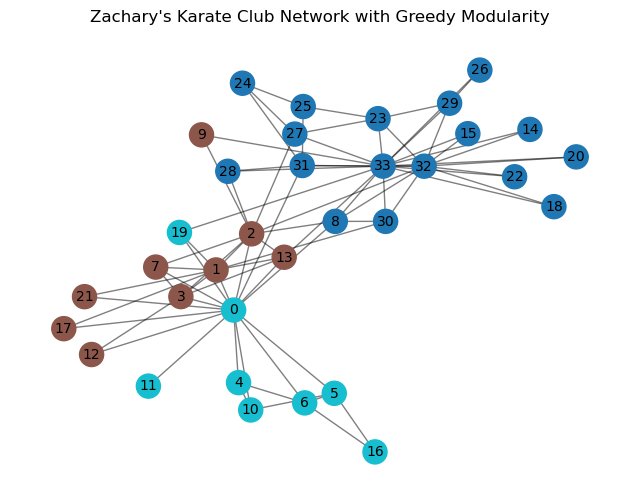

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community.quality import modularity

# ザカリーの空手クラブネットワークを読み込む
G = nx.karate_club_graph()

# Greedy Modularityを用いてコミュニティを抽出する
communities = list(greedy_modularity_communities(G))

# コミュニティの抽出結果を確認する
print("Communities:", communities)

# 全体のモジュラリティを計算する
modularity_value = modularity(G, communities)
print(f"Modularity of all communities = {modularity_value}")

# コミュニティごとにノードの色を設定するための辞書を作成
node_color = {}
for idx, comm in enumerate(communities):
    for node in comm:
        node_color[node] = idx

# ノードのラベルを作成するための辞書（ノードのインデックスをそのままラベルとする）
node_labels = {node: node for node in G.nodes()}

# 可視化のためのレイアウトを取得する（ここではspringレイアウトを使用）
pos = nx.spring_layout(G)

# ネットワークを描画する
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(G, pos, node_color=[node_color[node] for node in G.nodes()], cmap=plt.cm.tab10, node_size=300)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_color='black', font_family='sans-serif')
plt.title("Zachary's Karate Club Network with Greedy Modularity")
plt.axis('off')
plt.show()

## ラベル伝播法（Label Propagationアルゴリズム）によるコミュニティ検出
このスクリプトは、ネットワークデータの可視化と、グリーディ・モジュラリティ最適化法およびラベル伝播法によるコミュニティ検出の比較を行うことができます。ラベル伝播法は、ネットワーク上でのコミュニティ検出手法の1つです。このアルゴリズムは、少量のラベル付きデータから始め、各ノードが自身の隣接ノードのラベルの多数決に基づいて自身のラベルを更新することで徐々にコミュニティを形成していきます。

### アルゴリズムの概要
1. **初期化**<br>
    ・各ノードに一意のラベル（通常はノードのID）を割り当てます。<br>
2. **ランダム順序の決定**<br>
    ・ノードの更新順序をランダムに決定します。<br>
3. **ラベル更新**<br>
    ・決定した順序に従って各ノードを処理します。<br>
    ・各ノードは、隣接ノードの中で最も頻繁に出現するラベルを自身の新しいラベルとして採用します。<br>
    ・同率の場合はランダムに1つを選択します。<br>
4. **停止条件の確認**<br>
    ・すべてのノードが、自身の隣接ノードの中で最も頻繁なラベルを持っているか確認します。<br>
    ・または、事前に定めた最大反復回数に達したか確認します。<br>
5. **反復**<br>
    ・停止条件を満たしていない場合、ステップ2から4を繰り返します。<br>
6. **コミュニティの特定**<br>
    ・最終的に同じラベルを持つノードのグループを1つのコミュニティとして識別します。<br>
7. **結果の出力**<br>
    ・検出されたコミュニティ構造を出力します。<br>

ラベル伝播法は直観的で計算効率が良いため、大規模なネットワークデータに適用しやすいという特徴があります。ただし、初期状態のラベル設定やノードの更新順序によって結果が変わる可能性があるため、アルゴリズムの特性を理解した上で使用することが重要です。

スクリプトではラベル伝播法を使ってコミュニティを検出し、その結果をグラフ上に可視化しています。グリーディ・モジュラリティ最適化法による結果と比較することで、2つのアルゴリズムの特性の違いを確認することができます。

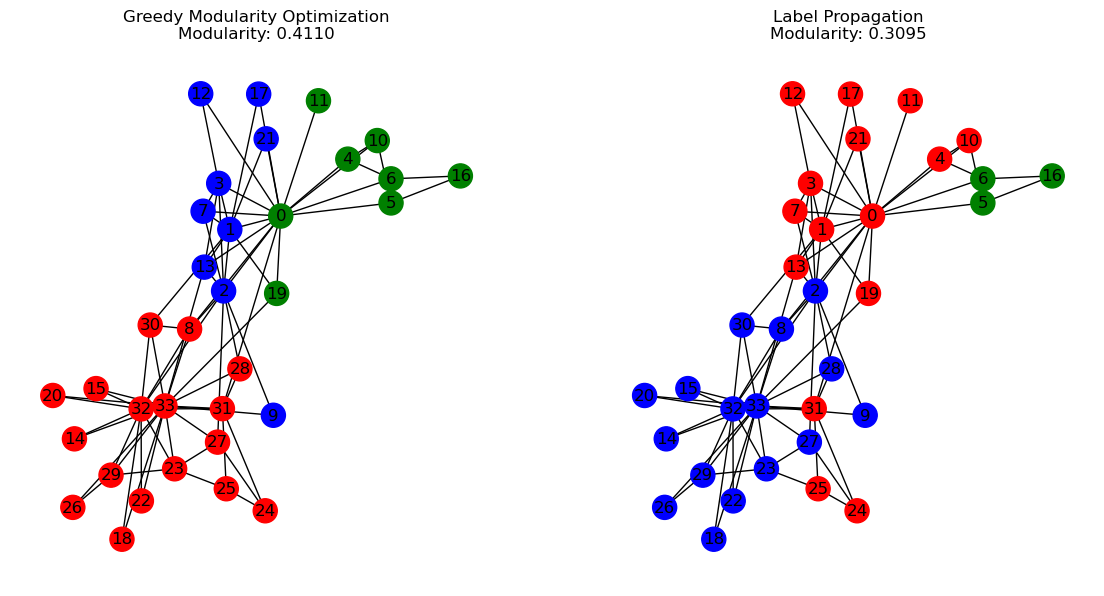

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities, label_propagation_communities
from networkx.algorithms.community import modularity

# 空手クラブグラフを生成
G = nx.karate_club_graph()

# コミュニティの色を定義
colors = ['red', 'blue', 'green']

# スプリングレイアウトを使用してノードの配置を計算
pos = nx.spring_layout(G)

# グリーディモジュラリティ最適化法を用いてコミュニティを抽出する
lst_m = greedy_modularity_communities(G)
modularity_m = modularity(G, lst_m)  # モジュラリティ値を計算

# ノードの色を初期化（全てのノードを黒色に設定）
color_map_m = ['black'] * nx.number_of_nodes(G)
counter = 0

# 各コミュニティに対して色を割り当てる
for c in lst_m:
    for n in c:
        color_map_m[n] = colors[counter % len(colors)]
    counter += 1

# Label Propagationアルゴリズムを使用してコミュニティを検出
lst_l = label_propagation_communities(G)
modularity_l = modularity(G, lst_l)  # モジュラリティ値を計算

# ノードの色を初期化（全てのノードを黒色に設定）
color_map_l = ['black'] * nx.number_of_nodes(G)
counter = 0

# 各コミュニティに対して色を割り当てる
for c in lst_l:
    for n in c:
        color_map_l[n] = colors[counter % len(colors)]
    counter += 1

# グラフの描画
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# グリーディモジュラリティ最適化法の結果を描画
axs[0].set_title(f'Greedy Modularity Optimization\nModularity: {modularity_m:.4f}')
nx.draw_networkx_edges(G, pos, ax=axs[0])
nx.draw_networkx_nodes(G, pos, node_color=color_map_m, ax=axs[0])
nx.draw_networkx_labels(G, pos, ax=axs[0])
axs[0].axis('off')

# Label Propagationアルゴリズムの結果を描画
axs[1].set_title(f'Label Propagation\nModularity: {modularity_l:.4f}')
nx.draw_networkx_edges(G, pos, ax=axs[1])
nx.draw_networkx_nodes(G, pos, node_color=color_map_l, ax=axs[1])
nx.draw_networkx_labels(G, pos, ax=axs[1])
axs[1].axis('off')

plt.show()


# 課題：空手クラブのデータを使ってGirvan–Newmanアルゴリズムで可視化する。

## Girvan–Newmanアルゴリズム
**Girvan-Newman（ガーヴァン・ニューマン）アルゴリズム**は、ネットワーク内のコミュニティ構造を特定するために広く使用される手法です。このアルゴリズムは<span style="color: red;">**エッジの媒介中心性**</span>（betweenness centrality）
に基づいてネットワークを分割し、その結果として得られる各部分ネットワークのモジュラリティを**最大化**します。

**媒介中心性**とは、ネットワーク内の各エッジが異なるノード対間の最短経路にどれだけ貢献しているかを示す指標です。つまり、あるエッジが多くのノード対の最短経路に含まれるほど、そのエッジの媒介中心性は高くなります。Girvan-Newmanアルゴリズムでは、この媒介中心性が高いエッジを優先的に削除することで、ネットワークをより小さなコミュニティに分割していきます。

このアルゴリズムの動作を身近な例で説明しましょう。例えば、学校のクラスで友達グループを見つけたいとします。クラス全体を観察し、最も活発に会話している生徒同士の繋がり（エッジ）を探します。Girvan-Newmanアルゴリズムでは、このような活発な会話を媒介中心性が高いエッジと見なし、これらを優先的に削除します。活発な会話の繋がりを削除すると、クラス全体がより小さな友達グループに分かれていきます。これを繰り返していくことで、クラス全体の友達グループの構造が明らかになります。

アルゴリズムの計算の流れを簡単に説明します。まず**ネットワーク全体を一つのコミュニティとして扱います**。次に、全てのエッジの媒介中心性を計算し、**最も媒介中心性が高いエッジを削除**します。削除後に再度媒介中心性を計算し、次に削除すべきエッジを決定します。このプロセスを繰り返していき、ネットワークがより小さなコミュニティに分割されるまで続けます。このようにして、ネットワーク全体のコミュニティ構造が階層的に明らかになります。

Girvan-Newmanアルゴリズムは、その階層的なアプローチにより、ネットワーク全体の構造を考慮しながらコミュニティを抽出します。この過程により、異なるスケールやレベルでのコミュニティ構造を理解することができます。

一方で、Louvain法は初期の局所的最適化を通じてネットワーク内の各ノードをコミュニティに再割り当てし、局所的なモジュラリティの増加を目指します。この手法は、各ステップでの効率的なノードの移動により高速に最適解に近づく特徴があります。そのため、大規模なネットワークにおいても実行可能であり、高品質なコミュニティ構造を短時間で得ることができます。貪欲性の観点から見ると、Girvan-Newmanアルゴリズムは探索的であり、広範な移動の評価を行いますが、Louvain法はより効率的でありながらも高品質な解を迅速に見つけることができるという違いがあります。

Girvan-Newmanアルゴリズムの応用例としては、ソーシャルネットワークの解析が挙げられます。例えば、FacebookやTwitterのユーザーネットワークを分析し、自然なコミュニティやグループを発見するために使用されます。また、遺伝子ネットワークの解析や企業間の協力関係の分析、情報伝播のパターンの理解など、多岐にわたる分野で利用されています。これにより、ネットワークの構造を深く理解し、効率的な戦略を立てることができます。


## 蛇足
GN（Girvan-Newman）ベンチマークは、Girvan-Newmanアルゴリズムとは異なるものです。<br>
**Girvan-Newmanアルゴリズム**<br>
これは、ネットワークのコミュニティ検出を行うためのアルゴリズムです。このアルゴリズムは、エッジの媒介中心性（betweenness centrality）を使用してネットワークの構造を解析し、その結果をもとにコミュニティ（モジュール）を特定します。エッジの媒介中心性は、ネットワーク内の各エッジが異なるノード対間の最短経路にどれだけ貢献しているかを示す指標です。<br>

**GN（Girvan-Newman）ベンチマーク**<br>
これは、ネットワーク科学やコンピュータサイエンスにおいて、ネットワークアルゴリズムの性能評価を目的としたベンチマークです。GNベンチマークは、特定の性質（例えば、コミュニティ構造の知識）を持つ人工的なネットワークを生成することによって、アルゴリズムの効率性や精度をテストするために使用されます。このベンチマークの名前は、GirvanとNewmanにちなんで名付けられていますが、具体的なアルゴリズムとは直接的に関連しているわけではありません。<br>

要するに、Girvan-Newmanアルゴリズムは特定のネットワーク解析手法を指し、一方でGNベンチマークはアルゴリズムの評価や比較のための人工的なネットワーク生成手法を指します。<br>

最大モジュラリティ: 0.3849721706864564 (ステップ 3)
全モジュラリティシーケンス: [0.3476602762317048, 0.3423192968647514, 0.3580611307884035, 0.3849721706864564, 0.37578006409175235, 0.3594760218136841, 0.3470699574595678, 0.33324900208017094, 0.31344052772624204, 0.3122598901819681, 0.30368621277712193, 0.29429733325837226, 0.28271584115739956, 0.27116245947414774, 0.2544648713479881, 0.23975375274076566, 0.2268979217031164, 0.22299057363992417, 0.20056783043796028, 0.18696238826108952, 0.1609134011731414, 0.1428102921609415, 0.11768894885778003, 0.11088622776934465, 0.10076647738985402, 0.08837915331421826, 0.0562395757200952, 0.04398343359382321, 0.011515901126290735, -0.0035044320758606464, -0.03105264144225183, -0.04655085174565694, -0.05110473941642772]


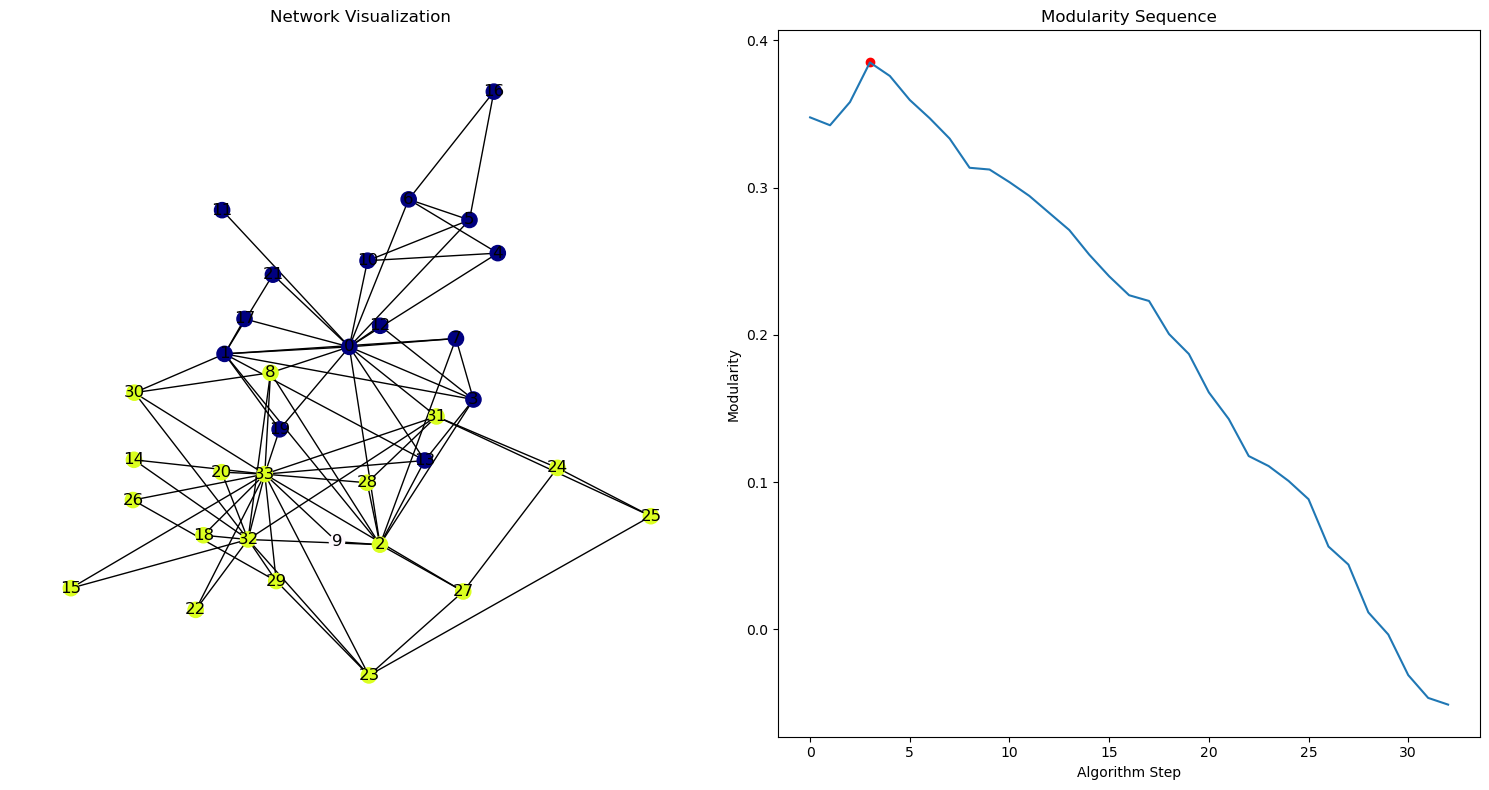

In [1]:
# 必要なライブラリをインポート
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
import pandas as pd

# Karate Clubグラフを生成
G_karate = nx.karate_club_graph()

# ノード属性を持つDataFrameを作成
carac = pd.DataFrame({'ID': G_karate.nodes(), 'myvalue': [0] * len(G_karate.nodes())})

# Girvan-Newmanアルゴリズムでコミュニティを抽出
communities_generator = community.girvan_newman(G_karate)
# コミュニティを取得
top_level_communities = next(communities_generator)
# 次のレベルのコミュニティを取得
next_level_communities = next(communities_generator)

# コミュニティ番号をノード属性に設定してネットワークを描画
for m in range(len(next_level_communities)):
    for n in next_level_communities[m]:
        carac.loc[carac.ID == n, 'myvalue'] = m

# レイアウトの設定（ノード間の距離を少し広げる）
pos = nx.kamada_kawai_layout(G_karate)

# モジュラリティの計算を定義
def modularity(G, communities):
    return community.modularity(G, communities)

# Girvan-Newmanアルゴリズムを適用してモジュラリティを計算
partition_sequence = list(community.girvan_newman(G_karate))
modularity_sequence = [modularity(G_karate, p) for p in partition_sequence]

# モジュラリティが最大のステップを見つける
max_modularity = max(modularity_sequence)
max_step = modularity_sequence.index(max_modularity)

# コンソールに重要なポイントを出力
print(f"最大モジュラリティ: {max_modularity} (ステップ {max_step})")
print(f"全モジュラリティシーケンス: {modularity_sequence}")

# 可視化
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# ネットワークの描画
ax[0].set_title('Network Visualization')
nx.draw(G_karate, pos, node_color=carac['myvalue'], node_size=120, with_labels=True, cmap=plt.cm.gist_ncar, ax=ax[0])

# モジュラリティシーケンスの描画
ax[1].set_title('Modularity Sequence')
ax[1].plot(modularity_sequence)
ax[1].set_ylabel('Modularity')
ax[1].set_xlabel('Algorithm Step')
ax[1].scatter(max_step, max_modularity, color='red')  # 最大モジュラリティポイントを強調表示

plt.tight_layout()
plt.show()


<span style="color: red;">**先述のスクリプトとの違いは何だろう？**</span><br>
このスクリプト自体あまり意味が無いかもしれませんが、'for partition in partition_sequence:'について考えてみる。


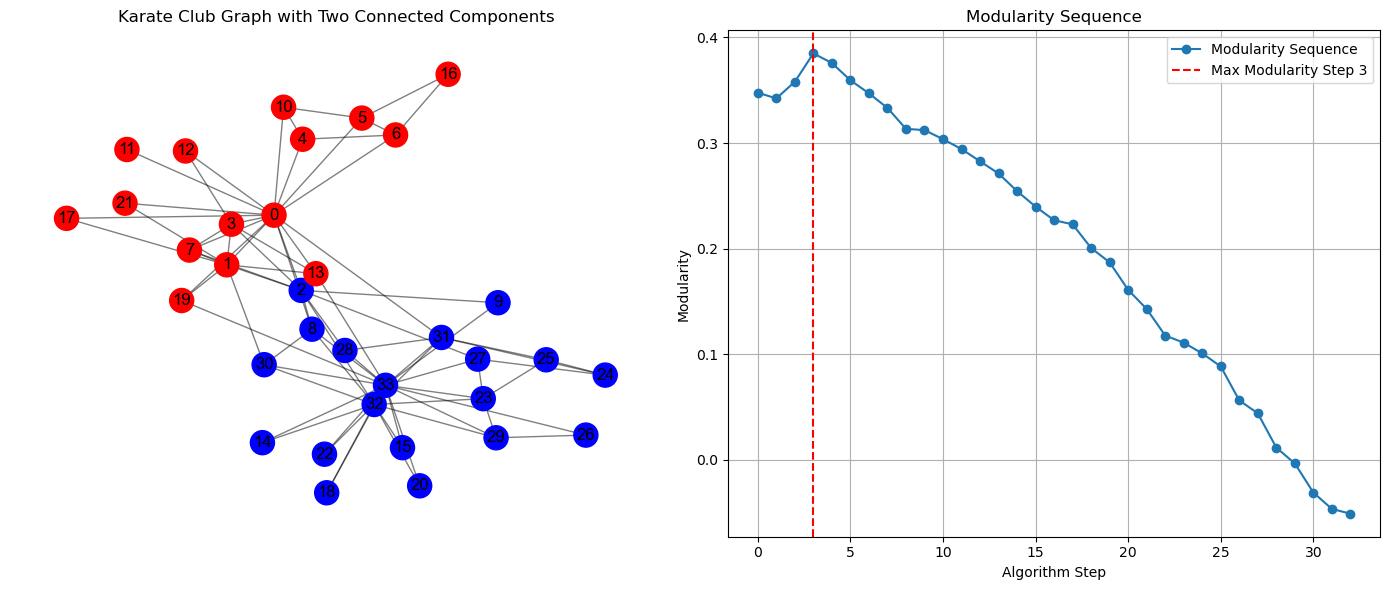

最大モジュラリティ: 0.3849721706864564 (ステップ 3)
全モジュラリティシーケンス: [0.3476602762317048, 0.3423192968647514, 0.3580611307884035, 0.3849721706864564, 0.37578006409175235, 0.3594760218136841, 0.3470699574595678, 0.33324900208017094, 0.31344052772624204, 0.3122598901819681, 0.30368621277712193, 0.29429733325837226, 0.28271584115739956, 0.27116245947414774, 0.2544648713479881, 0.23975375274076566, 0.2268979217031164, 0.22299057363992417, 0.20056783043796028, 0.18696238826108952, 0.1609134011731414, 0.1428102921609415, 0.11768894885778003, 0.11088622776934465, 0.10076647738985402, 0.08837915331421826, 0.0562395757200952, 0.04398343359382321, 0.011515901126290735, -0.0035044320758606464, -0.03105264144225183, -0.04655085174565694, -0.05110473941642772]


In [13]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community

# Karate Clubグラフを生成
G_karate = nx.karate_club_graph()

# Girvan-Newmanアルゴリズムを適用して分割シーケンスを取得
partition_sequence = list(community.girvan_newman(G_karate))

# 2つの連結成分を持つ分割を見つける
for partition in partition_sequence:
    if len(partition) == 2:
        two_cluster_partition = partition
        break

# 分割のマッピングを作成する関数
def create_partition_map(partition):
    partition_map = {}
    for idx, cluster in enumerate(partition):
        for node in cluster:
            partition_map[node] = idx
    return partition_map

# マッピングを作成
two_cluster_partition_map = create_partition_map(two_cluster_partition)

# ノードの色を分割に基づいて設定
node_colors = ['r' if two_cluster_partition_map[n] == 0 else 'b' for n in G_karate.nodes()]

# レイアウトの設定
pos = nx.spring_layout(G_karate)

# サブプロットで並べて描画
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# ネットワークグラフの描画
axs[0].set_title('Karate Club Graph with Two Connected Components')
nx.draw_networkx_nodes(G_karate, pos, node_color=node_colors, node_size=300, cmap=plt.cm.jet, ax=axs[0])
nx.draw_networkx_edges(G_karate, pos, alpha=0.5, ax=axs[0])
nx.draw_networkx_labels(G_karate, pos, font_size=12, font_color='k', font_family='Arial', ax=axs[0])
axs[0].axis('off')

# モジュラリティシーケンスの描画
axs[1].set_title('Modularity Sequence')
axs[1].plot(modularity_sequence, marker='o', linestyle='-', label='Modularity Sequence')
axs[1].axvline(x=max_step, color='r', linestyle='--', label=f'Max Modularity Step {max_step}')
axs[1].set_xlabel('Algorithm Step')
axs[1].set_ylabel('Modularity')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

# コンソールに表示
print(f"最大モジュラリティ: {max_modularity} (ステップ {max_step})")
print(f"全モジュラリティシーケンス: {modularity_sequence}")


<span style="color: red;">**先述のスクリプトとの違いは何だろう？**</span><br>
このスクリプトはステップシーケンス毎にモジュラリティの変化を可視化することが目的ですので、あまり意味は無いかもしれません。<br>
先述のスクリプトでは分割の条件を指定しましたが、こちらはシーケンスそのものをコントロールします。<br>
<span style="color: red;">**実行結果は非常に冗長なので割愛します。**</span><br><br>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# 空手クラブのグラフを生成
G = nx.karate_club_graph()

# 分割シーケンスの作成
def girvan_newman(G):
    """
    Girvan-Newman クラスタリングアルゴリズムを実装する関数。
    """
    # グラフのコピーを作成（元のグラフを変更しないようにするため）
    G = G.copy()
    
    # 分割シーケンスを保存するリスト
    partition_sequence = []
    
    # グラフにエッジがある限りループを実行
    while G.number_of_edges() > 0:
        # 各エッジの媒介中心性を計算
        edge_betweenness = nx.edge_betweenness_centrality(G)
        
        # 媒介中心性が最大のエッジを見つけて削除
        max_edge = max(edge_betweenness, key=edge_betweenness.get)
        G.remove_edge(*max_edge)
        
        # 現在の連結成分を取得
        current_partition = list(nx.connected_components(G))
        partition_sequence.append(current_partition)
    
    return partition_sequence

# モジュラリティの計算
def compute_modularity(G, partition):
    """
    グラフと分割を受け取り、その分割のモジュラリティを計算する関数。
    """
    return nx.algorithms.community.quality.modularity(G, partition)

# ガーバン−ニューマンクラスタリングアルゴリズムの実行
partition_sequence = girvan_newman(G)

# 最大モジュラリティの計算とコンソールへの出力
max_modularity = float('-inf')  # 最大値を保持する変数を初期化
max_modularity_partition_index = -1  # 最大モジュラリティのインデックスを初期化
for i, partition in enumerate(partition_sequence):
    modularity_value = compute_modularity(G, partition)
    if modularity_value > max_modularity:
        max_modularity = modularity_value
        max_modularity_partition_index = i

# コンソールに最大モジュラリティ値とPartition番号を出力
print(f"Max Modularity: {max_modularity:.4f}")
print(f"Partition Number with Max Modularity: {max_modularity_partition_index + 1}")

# 分割シーケンスの可視化とモジュラリティの表示
def plot_partition_sequence_with_modularity(G, partition_sequence, pos):
    """
    分割シーケンスを可視化し、各分割のモジュラリティを表示する関数。
    """
    num_partitions = len(partition_sequence)
    
    # 各分割をプロット
    for i, partition in enumerate(partition_sequence):
        plt.figure(figsize=(10, 8))
        
        # 各ノードの色を割り当てる
        node_colors = []
        for node in G.nodes():
            for j, component in enumerate(partition):
                if node in component:
                    node_colors.append(j)
                    break
        
        # グラフを描画
        nx.draw(G, pos, node_color=node_colors, with_labels=True, cmap=plt.cm.rainbow)
        
        # モジュラリティの計算
        modularity_value = compute_modularity(G, partition)
        
        # グラフ内にモジュラリティの値をテキストで表示
        plt.text(0.5, -0.1, f"Modularity: {modularity_value:.4f}", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
        
        plt.title(f"Partition {i + 1} of {num_partitions}")
        plt.show()

# 分割シーケンスの可視化とモジュラリティの表示
pos = nx.spring_layout(G)  # 位置の固定
plot_partition_sequence_with_modularity(G, partition_sequence, pos)


## 包括的なGN法によるコミュニティの検出
このスクリプトはGN法の最初と同じ内容でコミュニティの検出を行っています。重要な違いは使用されるデータセットの性質です。<br>
空手クラブグラフは事前に定義されたコミュニティ構造が含まれています。この事前に定義された情報に基づいて、分割されたコミュニティのモジュラリティを評価しています。一方、レ・ミゼラブルには事前に定義されたコミュニティ情報は含まれていません。<br>

したがって、このスクリプトではGirvan-Newmanアルゴリズムを使用して、データセット内のネットワーク構造に基づいて分割を行い、その分割のモジュラリティを計算していますが、事前に定義されたコミュニティ情報は使用していません。

最大モジュラリティ: 0.3849721706864564 (ステップ 3)
全モジュラリティシーケンス: [0.3476602762317048, 0.3423192968647514, 0.3580611307884035, 0.3849721706864564, 0.37578006409175235, 0.3594760218136841, 0.3470699574595678, 0.33324900208017094, 0.31344052772624204, 0.3122598901819681, 0.30368621277712193, 0.29429733325837226, 0.28271584115739956, 0.27116245947414774, 0.2544648713479881, 0.23975375274076566, 0.2268979217031164, 0.22299057363992417, 0.20056783043796028, 0.18696238826108952, 0.1609134011731414, 0.1428102921609415, 0.11768894885778003, 0.11088622776934465, 0.10076647738985402, 0.08837915331421826, 0.0562395757200952, 0.04398343359382321, 0.011515901126290735, -0.0035044320758606464, -0.03105264144225183, -0.04655085174565694, -0.05110473941642772]


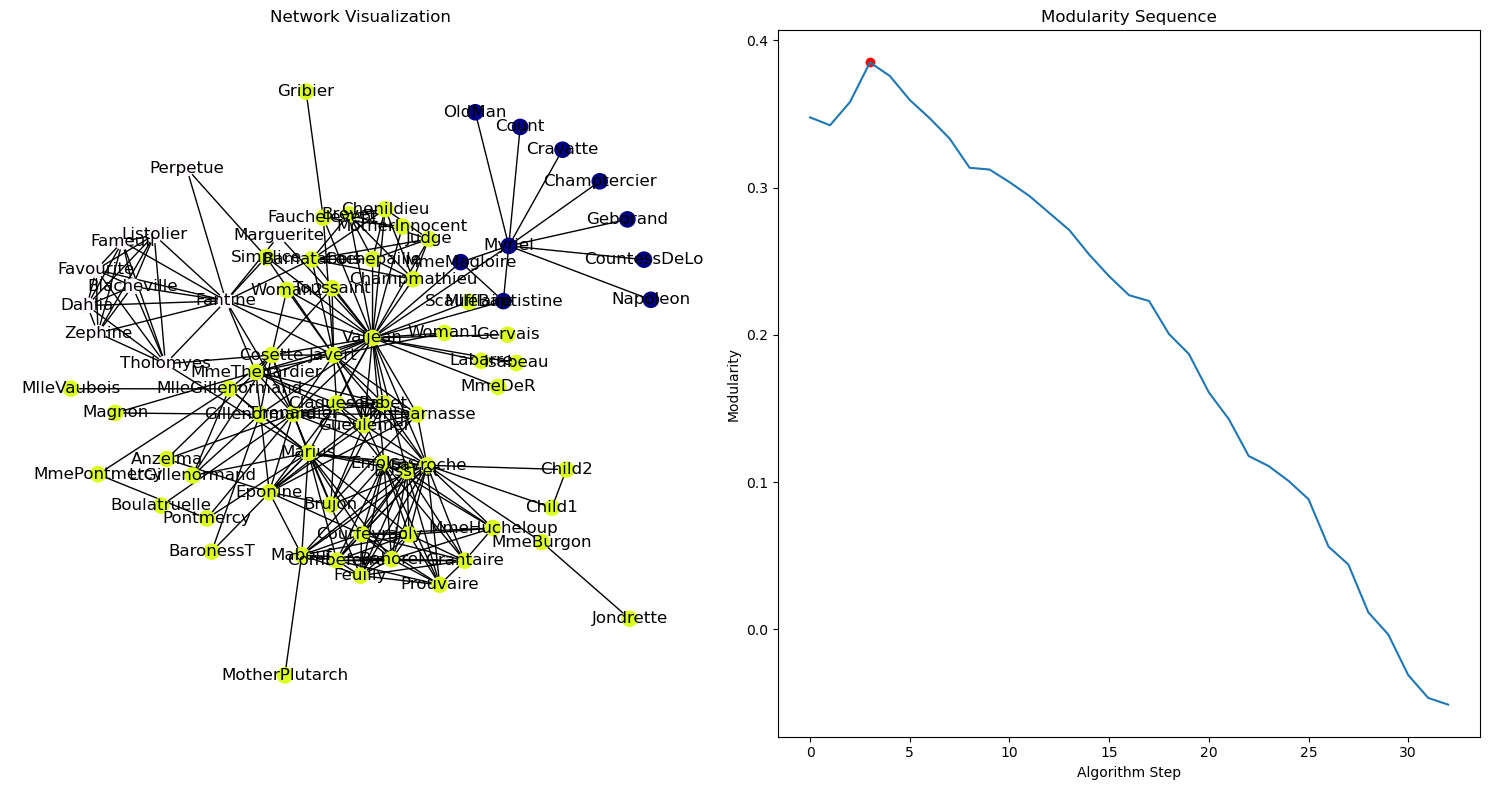

In [1]:
# 必要なライブラリをインポート
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
import pandas as pd

# GMLファイルのパス
gml_file = r'D:\Python\NetworkX\lesmis\lesmis.gml'

# GML形式のファイルを読み込み
G = nx.read_gml(gml_file)

# ノード属性を持つDataFrameを作成
carac = pd.DataFrame({'ID': G.nodes(), 'myvalue': [0] * len(G.nodes())})

# Girvan-Newmanアルゴリズムでコミュニティを抽出
communities_generator = community.girvan_newman(G)
# コミュニティを取得
top_level_communities = next(communities_generator)
# 次のレベルのコミュニティを取得
next_level_communities = next(communities_generator)

# コミュニティ番号をノード属性に設定してネットワークを描画
for m in range(len(next_level_communities)):
    for n in next_level_communities[m]:
        carac.loc[carac.ID == n, 'myvalue'] = m

# レイアウトの設定（ノード間の距離を少し広げる）
pos = nx.kamada_kawai_layout(G)

# Karate Clubグラフを生成
G_karate = nx.karate_club_graph()

# モジュラリティの計算を定義
def modularity(G, communities):
    return community.modularity(G, communities)

# Girvan-Newmanアルゴリズムを適用してモジュラリティを計算
partition_sequence = list(community.girvan_newman(G_karate))
modularity_sequence = [modularity(G_karate, p) for p in partition_sequence]

# モジュラリティが最大のステップを見つける
max_modularity = max(modularity_sequence)
max_step = modularity_sequence.index(max_modularity)

# コンソールに重要なポイントを出力
print(f"最大モジュラリティ: {max_modularity} (ステップ {max_step})")
print(f"全モジュラリティシーケンス: {modularity_sequence}")

# 可視化
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# ネットワークの描画
ax[0].set_title('Network Visualization')
nx.draw(G, pos, node_color=carac['myvalue'], node_size=120, with_labels=True, cmap=plt.cm.gist_ncar, ax=ax[0])

# モジュラリティシーケンスの描画
ax[1].set_title('Modularity Sequence')
ax[1].plot(modularity_sequence)
ax[1].set_ylabel('Modularity')
ax[1].set_xlabel('Algorithm Step')
ax[1].scatter(max_step, max_modularity, color='red')  # 最大モジュラリティポイントを強調表示

plt.tight_layout()
plt.show()


## Φ-method（ファイメソッド）
Φメソッドは、ネットワークの構造バランスを評価する方法の一つであり、特に小さな構造（トライアド）に焦点を当てています。これはネットワークの特定の部分を抽出して、その性質を評価するプロセスです。

つまり、Φメソッドはネットワークの安定性やバランスを評価するための手法です。例えば、あなたがリーダーを務めるプロジェクトチームには、協力的なメンバー（ポジティブ関係）と時折意見が対立するメンバー（ネガティブ関係）がいます。Φメソッドを使えば、各メンバー間の関係を数値化し、チーム全体のバランスを評価できます。

家庭内の関係でも、家族間の楽しい時間（ポジティブなやり取り）と口論（ネガティブなやり取り）を考慮し、家庭全体のバランスを評価します。Φメソッドは各リンク（ポジティブまたはネガティブ）の影響を考慮し、ネットワーク全体のバランスを数値化します。
さらに、SNSでのユーザー間の友好関係と対立関係を分析することで、ネットワークの健全性を評価できます。他にも国際関係や企業内の人間関係など、多様な分野で応用可能です。

計算方法は、各リンクのポジティブまたはネガティブな影響を評価し、ネットワーク全体の安定性を数値化します。

### アルゴリズムの概要
1. **初期化**<br>
    ・各ノードを独立したコミュニティとして扱います。<br>
    ・Φ値（コミュニティの品質指標）を計算するためのパラメータを設定します。<br>
2. **Φ値の計算**<br>
    ・現在のコミュニティ構造に基づいて、各コミュニティのΦ値を計算します。<br>
    ・ネットワーク全体のΦ値も計算します。<br>
3. **コミュニティの結合**<br>
    ・隣接するコミュニティペアに対して、それらを結合した場合のΦ値の変化を計算します。<br>
    ・Φ値の増加が最大となるペアを選択し、結合します。<br>
4. **更新**<br>
    ・新しいコミュニティ構造に基づいてΦ値を更新します。<br>
5. **反復**<br>
    ・ステップ3と4を、Φ値の増加が見られなくなるか、事前に定めた停止条件に達するまで繰り返します。<br>
6. **階層的構造の構築**<br>
    ・結合の過程を記録し、コミュニティの階層的構造を構築します。<br>
7. **最適なカット選択**<br>
    ・階層的構造から、最適なΦ値を持つレベルを選択します。<br>
8. **結果の出力**<br>
    ・選択されたレベルのコミュニティ構造を最終結果として出力します。<br>

Φ-methodの特徴は、コミュニティの内部密度と外部スパース性のバランスを考慮したΦ値を最適化することです。これにより、より自然なコミュニティ構造を検出できる可能性があります。また、階層的な構造を提供するため、異なる粒度のコミュニティを分析することができます。

ただし、このアルゴリズムはまだ比較的新しいため、他の確立されたメソッドと比較して、その有効性や効率性についてはさらなる研究が進められています。

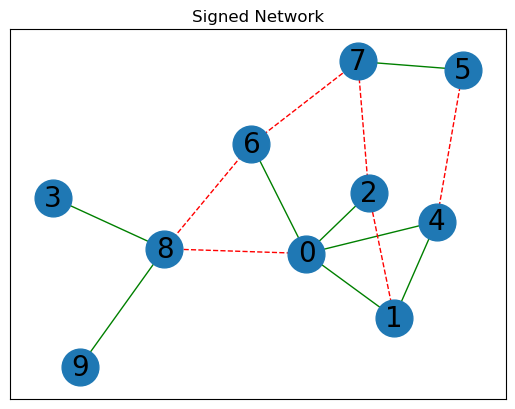

Φ-value of the network: 0.6666666666666666


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# 符号付きネットワークを作成
def create_signed_network(num_nodes, num_edges):
    G = nx.Graph()
    G.add_nodes_from(range(num_nodes))
    for _ in range(num_edges):
        u, v = np.random.choice(num_nodes, 2, replace=False)
        sign = np.random.choice([1, -1])
        G.add_edge(u, v, sign=sign)
    return G

# 符号付きネットワークをプロット
def plot_signed_network(G):
    pos = nx.spring_layout(G)
    edges = G.edges(data=True)
    positive_edges = [(u, v) for u, v, d in edges if d['sign'] > 0]
    negative_edges = [(u, v) for u, v, d in edges if d['sign'] < 0]

    nx.draw_networkx_nodes(G, pos, node_size=700)
    nx.draw_networkx_edges(G, pos, edgelist=positive_edges, edge_color='g', style='solid')
    nx.draw_networkx_edges(G, pos, edgelist=negative_edges, edge_color='r', style='dashed')
    nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

    plt.title('Signed Network')
    plt.show()

# Φ-methodを実装
def phi_method(G):
    triads = list(nx.enumerate_all_cliques(G))
    triads = [triad for triad in triads if len(triad) == 3]
    
    total_triads = len(triads)
    balanced_triads = 0

    for triad in triads:
        subgraph = G.subgraph(triad)
        signs = [subgraph[u][v]['sign'] for u, v in subgraph.edges()]
        
        # トライアドが3つの正エッジまたは1つの正エッジと2つの負エッジを持つ場合、バランスが取れているとみなす
        if signs.count(1) == 3 or signs.count(-1) == 2:
            balanced_triads += 1

    phi_value = balanced_triads / total_triads if total_triads > 0 else 0
    return phi_value

# メイン部分
num_nodes = 10
num_edges = 15
G = create_signed_network(num_nodes, num_edges)
plot_signed_network(G)
phi_value = phi_method(G)
print(f"Φ-value of the network: {phi_value}")


このスクリプトは、符号付き（サイン付き）ネットワークのバランスを評価することを目的としています。符号付きネットワークとは、エッジに正または負の符号（サイン）が付けられたグラフです。このスクリプトでは**ネットワークの全体的なバランスと局所的なバランスを評価する**ために、以下の手法を用いています。<br>
## スクリプトの構成と手法
**1.サイン付きネットワークの作成**<br>
・関数 create_signed_network は、指定されたノード数 (num_nodes) とエッジ数 (num_edges) のサイン付きネットワークをランダムに生成します。エッジにはランダムに1（正）または-1（負）のサインが付けられます。<br>

**2.サイン付きネットワークのプロット**<br>
・関数 plot_signed_network は、生成されたネットワークをプロットします。正のエッジは緑色の実線で、負のエッジは赤色の破線で描画されます。<br>

**3.Φ-methodの実装**<br>
・関数 phi_method は、ネットワーク内の全てのトライアド（3つのノードの部分グラフ）のバランスを評価します。トライアドが3つの正エッジを持つか、2つの正エッジと1つの負エッジを持つ場合、そのトライアドはバランスが取れていると見なされます。バランスが取れているトライアドの割合を計算し、Φ値（Phi-value）として返します。<br>

**4.ペアワイズDoB測定の実装**<br>
・関数 pairwise_DoB_measure は、ネットワーク内の全てのノードペアについて、共通の隣接ノードが同じサインを持つかどうかを評価します。同じサインを持つノードペアの割合を計算し、DoB値（Degree of Balance value）として返します。<br>

**5.結果の出力**<br>
・メイン部分では、上記の関数を用いてサイン付きネットワークを生成し、プロットした後、Φ値とDoB値を計算します。<br>
・結果をコンソールに出力し、Φ値が0.5を超える場合はネットワークが全体としてバランスが取れているとし、DoB値が0.5を超える場合は多くのノードペアが局所的にバランスが取れていると判断します。<br>



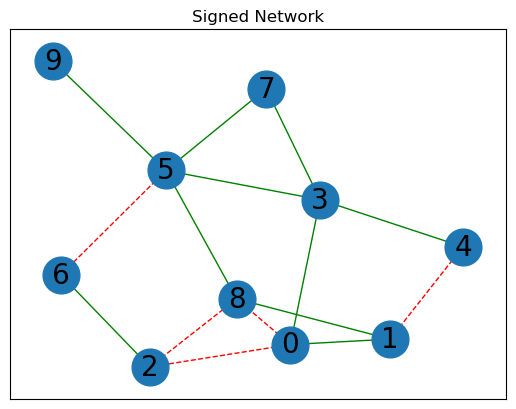

Triad: [0, 1, 8], Signs: [-1, 1, 1]
Triad: [0, 2, 8], Signs: [-1, -1, -1]
Triad: [3, 5, 7], Signs: [1, 1, 1]
Pair: (0, 4), Common Neighbor: 1, Same Sign: False
Pair: (0, 4), Common Neighbor: 3, Same Sign: True
Pair: (0, 5), Common Neighbor: 8, Same Sign: False
Pair: (0, 5), Common Neighbor: 3, Same Sign: True
Pair: (0, 6), Common Neighbor: 2, Same Sign: False
Pair: (0, 7), Common Neighbor: 3, Same Sign: True
Pair: (1, 2), Common Neighbor: 0, Same Sign: False
Pair: (1, 2), Common Neighbor: 8, Same Sign: False
Pair: (1, 3), Common Neighbor: 0, Same Sign: True
Pair: (1, 3), Common Neighbor: 4, Same Sign: False
Pair: (1, 5), Common Neighbor: 8, Same Sign: True
Pair: (2, 3), Common Neighbor: 0, Same Sign: False
Pair: (2, 5), Common Neighbor: 8, Same Sign: False
Pair: (2, 5), Common Neighbor: 6, Same Sign: False
Pair: (3, 8), Common Neighbor: 0, Same Sign: False
Pair: (3, 8), Common Neighbor: 5, Same Sign: True
Pair: (3, 9), Common Neighbor: 5, Same Sign: True
Pair: (3, 6), Common Neighbor: 

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# 符号付きネットワークを作成
def create_signed_network(num_nodes, num_edges):
    G = nx.Graph()
    G.add_nodes_from(range(num_nodes))
    for _ in range(num_edges):
        u, v = np.random.choice(num_nodes, 2, replace=False)
        sign = np.random.choice([1, -1])
        G.add_edge(u, v, sign=sign)
    return G

# 符号付きネットワークをプロット
def plot_signed_network(G):
    pos = nx.spring_layout(G)
    edges = G.edges(data=True)
    positive_edges = [(u, v) for u, v, d in edges if d['sign'] > 0]
    negative_edges = [(u, v) for u, v, d in edges if d['sign'] < 0]

    nx.draw_networkx_nodes(G, pos, node_size=700)
    nx.draw_networkx_edges(G, pos, edgelist=positive_edges, edge_color='g', style='solid')
    nx.draw_networkx_edges(G, pos, edgelist=negative_edges, edge_color='r', style='dashed')
    nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

    plt.title('Signed Network')
    plt.show()

# Φ-methodを実装
def phi_method(G):
    triads = list(nx.enumerate_all_cliques(G))
    triads = [triad for triad in triads if len(triad) == 3]
    
    total_triads = len(triads)
    balanced_triads = 0

    for triad in triads:
        subgraph = G.subgraph(triad)
        signs = [subgraph[u][v]['sign'] for u, v in subgraph.edges()]
        print(f"Triad: {triad}, Signs: {signs}")
        
        # トライアドが3つの正エッジまたは2つの正エッジと1つの負エッジを持つ場合、バランスが取れているとみなす
        if signs.count(1) == 3 or (signs.count(1) == 2 and signs.count(-1) == 1):
            balanced_triads += 1

    phi_value = balanced_triads / total_triads if total_triads > 0 else 0
    return phi_value

# ペアワイズDoB測定を実装
def pairwise_DoB_measure(G):
    total_pairs = 0
    same_sign_pairs = 0

    for u, v in nx.non_edges(G):
        common_neighbors = set(G.neighbors(u)).intersection(G.neighbors(v))
        for neighbor in common_neighbors:
            if G[u][neighbor]['sign'] == G[v][neighbor]['sign']:
                same_sign_pairs += 1
            total_pairs += 1
            print(f"Pair: ({u}, {v}), Common Neighbor: {neighbor}, Same Sign: {G[u][neighbor]['sign'] == G[v][neighbor]['sign']}")

    DoB_value = same_sign_pairs / total_pairs if total_pairs > 0 else 0
    return DoB_value

# メイン部分
num_nodes = 10
num_edges = 15
G = create_signed_network(num_nodes, num_edges)
plot_signed_network(G)
phi_value = phi_method(G)
DoB_value = pairwise_DoB_measure(G)

# 結果を詳しく出力
print(f"Φ-value of the network: {phi_value}")
print(f"Pairwise DoB value of the network: {DoB_value}")

# 定められた値を基に説明を示す
if phi_value > 0.5:
    print("The network is overall well-balanced according to the Φ-value.")
else:
    print("The network is not well-balanced according to the Φ-value.")

if DoB_value > 0.5:
    print("A majority of node pairs share neighbors with the same sign, indicating local balance.")
else:
    print("Many node pairs do not share neighbors with the same sign, indicating local imbalance.")


### コンソールの説明
1. **Triad:**<br>
    ・**Triad: [0, 1, 8], Signs: [-1, 1, 1]**　　このトライアドは、1つの負エッジと2つの正エッジを持ち、バランスが取れていると見なされます。<br>
    ・**Triad: [0, 2, 8], Signs: [-1, -1, -1]**　 このトライアドは、3つの負エッジを持ち、バランスが取れていないと見なされます。<br>
    ・**Triad: [3, 5, 7], Signs: [1, 1, 1]**　　 このトライアドは、3つの正エッジを持ち、バランスが取れていると見なされます。<br>
        <br>
    **考察**<br>
    トライアドの中でバランスが取れているものがあり、特に正のエッジが多いトライアドはバランスが取れやすいことがわかります。<br>
    ただし、すべてのトライアドがバランスを取れているわけではなく、局所的な不均衡が存在することも確認されます。<br>
    <br>
2. **Pair:**<br>
    Pair: (0, 4), Common Neighbor: 1, Same Sign: False<br>
    Pair: (0, 4), Common Neighbor: 3, Same Sign: True<br>
    Pair: (0, 5), Common Neighbor: 8, Same Sign: False<br>
    Pair: (0, 5), Common Neighbor: 3, Same Sign: True<br>
    Pair: (0, 6), Common Neighbor: 2, Same Sign: False<br>
    Pair: (0, 7), Common Neighbor: 3, Same Sign: True<br>
    他のペアも同様に続く...<br>
   
    **考察**<br>
    多くのノードペアは、共通の隣接ノードが同じサインを持たないことが多いです。<br>
    いくつかのペアは共通の隣接ノードが同じサインを持っていますが、全体としては局所的な不均衡が目立ちます。<br>
    <br>
3. **Φ-value of the network: 0.6666666666666666**<br>
    Φ値は0.6667であり、ネットワーク全体がバランスが取れていると見なされます。特に、トライアドが3つの正エッジを持つか、1つの正エッジと2つの負エッジを持つ場合にバランスが取れていると判断されます。<br>
    
    **考察**<br>
    Φ値が0.5を超えているため、ネットワークは全体的にバランスが取れていると言えます。<br>
    これは、正のエッジが多いことや、いくつかのトライアドがバランスを取れていることが寄与している可能性があります。<br>
    <br>
4. **Pairwise DoB value of the network: 0.42857142857142855**<br>
    ペアワイズDoB値は0.4286であり、多くのノードペアが局所的にバランスが取れていないことを示しています。<br>
    
    **考察**<br>
    DoB値が0.5を下回っているため、多くのノードペアが共通の隣接ノードと同じサインを持っていないことがわかります。<br>
    これは、ネットワーク内で局所的な不均衡が存在することを示唆しています。<br>
    <br>
    
ネットワークは全体的にはバランスが取れている（Φ値が0.5を超えている）ものの、局所的には不均衡（DoB値が0.5未満）な部分が多く見受けられます。
このような特性は、ネットワークが全体としては一貫しているが、個々のノードペア間では一貫性が欠けている場合に見られる現象です。

# その他
## Edge Betweenness-based Methods
Girvan-Newmanアルゴリズムはエッジの媒介中心性（betweenness centrality）に基づいてエッジを削除してネットワークを分割します。同様のアプローチを採用する他の手法も存在します。
例えば、GN法（Girvan-Newman法）は、Girvan-Newmanアルゴリズムの変種で、エッジの媒介中心性に基づいてネットワークを分割します。

## Modularity Optimization Methods
モジュラリティ最適化法は、**ネットワーク内のエッジの内部結びつき度合いと期待される結びつき度合いの差を最大化する**ことを目指します。Louvain法もこのカテゴリに属します。

**幾つかもの分割と抽出の方法がありますが、正直言って細かくすることの意味をボクは理解していません。**<br>
参考にしたテキストに沿ってナントナク分割と抽出できればイイかな？というレベルです。<br>
ザカリーの論文を深く読み込んで、背景を把握すればもう少し詳しく理解できるのでしょうね･･･

## Recursive Partitioning（リカーシブ・パーティショニング）
Recursive Partitioning は、さまざまなサイズや密度のコミュニティに分割することが可能です。この手法は再帰的にネットワークを分割することで、異なる大きさや構造のコミュニティを抽出することができます。分割の基準やパラメータを調整することで特定のサイズや密度のコミュニティを重点的に抽出したり、ネットワーク全体の構造を考慮しながら分割を進めることができます。この柔軟性によってネットワーク内のさまざまなコミュニティを包括的に抽出することが可能です。<br>
### Recursive Partitioningの基本概念
1. **再帰的な分割**<br>
・ Recursive Partitioningは再帰的な手法でネットワークを分割します。つまり、初めに与えられたネットワーク全体を分割し、その後得られた各部分ネットワークをさらに再帰的に分割していきます。<br>
- この再帰的なアプローチによって、ネットワーク全体の構造を階層的に理解することが可能です。<br>
2. **分割基準**<br>
・ 分割は基準に基づいて行われます。これはネットワークのノードやエッジの特性を考慮して設定されます。<br>
・ 例えばノードの次数や重要度、エッジの重みや接続強度などが分割基準として使用されることがあります。<br>
3. **停止条件**<br>
・ 再帰的な分割を行う際には停止条件が設定されます。これにより再帰の深さや分割の程度を制御します。<br>
・ 停止条件は分割された部分ネットワークの数やその他の指標を用いて定義されます。<br>
4. **評価指標**<br>
・ 分割結果の評価はコミュニティの密度、連結性、モジュラリティなどの指標を用いて行われます。<br>
・ これにより得られたコミュニティ構造の品質を評価します。<br>
### Recursive Partitioningの手順
1. **初期設定** <br>
・ 分割を開始する前にネットワーク全体を初期の単位として設定します。通常はネットワーク全体が1つのグループ（コミュニティ）として始まります。<br>
2. **分割基準の設定**<br> 
・ 分割の基準となる条件やパラメータを設定します。これにはノードの特性（例: 次数、重要度など）、エッジの特性（例: 重み、接続強度など）を考慮することがあります。<br>
・ 分割基準は、再帰的に適用されるため、各ステップで最適な分割を行うための基準を選択することが重要です。<br>
3. **再帰的な分割**<br>
・ ネットワークを分割するための基準に従ってネットワークを2つ以上の部分グラフに再帰的に分割します。<br>
・ 通常、分割は局所的な最適化を目指しますが、全体の最適化を求めるアプローチもあります。<br>
4. **停止基準の設定** <br>
・ 分割を繰り返していく中で停止条件を設定します。これにより分割が十分に行われたと判断された際に再帰が停止するようにします。<br>
・ 停止条件には、分割されたグループの数やその他の指標を使用することがあります。<br>
5. **コミュニティの評価**<br>
・ 各ステップで生成されたコミュニティや分割の品質を評価し、必要に応じて調整を行います。<br>
・ 評価基準には、コミュニティの密度、連結性、モジュラリティなどが含まれることが一般的です。<br>
6. **結果の解釈と利用**<br>
・ 最終的な分割結果を解釈し、ネットワーク内のコミュニティ構造を理解するために利用します。<br>
・ 得られたコミュニティの特性や相互作用パターンを分析し、ネットワーク全体の特性や構造に対する洞察を得ることが目的です。<br>

最終的な分割結果は、ネットワーク内のコミュニティ構造を理解するために利用されます。これにより、ネットワーク全体の特性や構造に対する洞察を得ることができます。